## Training Artificial Neural Networks for City Fuel Efficiency Analysis in Miles Per Gallon (MPG)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

np.random.seed = 47

veh = pd.read_csv('C:/Users/dunzz2001/Desktop/vehiclesdata/vehicles1984to2018.csv');

veh.head

C:\Users\dunzz2001\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (71,73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method DataFrame.head of        barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19      0.0        0   
1      29.964545         0.0        0.0        0.0       9      0.0        0   
2      12.207778         0.0        0.0        0.0      23      0.0        0   
3      29.964545         0.0        0.0        0.0      10      0.0        0   
4      17.347895         0.0        0.0        0.0      17      0.0        0   
5      14.982273         0.0        0.0        0.0      21      0.0        0   
6      13.184400         0.0        0.0        0.0      22      0.0        0   
7      13.733750         0.0        0.0        0.0      23      0.0        0   
8      12.677308         0.0        0.0        0.0      23      0.0        0   
9      13.184400         0.0        0.0        0.0      23      0.0        0   
10     12.677308         0.0        0.0        0.0      23      0.0        0   
11     1

In [3]:
# Displaying headings from vehicles dataset.
veh.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### Dataset Cleaning & Exploratory Analysis

In [4]:
# Importing nan an NA from NumPy for handling NaN and NA values.
from numpy import nan as NA

In [5]:
# Assigning veh data to dataframe df1.
df1 = veh

In [6]:
# Displaying headings in dataframe df1.
df1.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [7]:
# Assiging dataframe df1 dataset to new dataframe dfcleaned, which will store cleaned data.
dfcleaned = df1

In [8]:
# Displaying headings in dataframe dfcleaned.
dfcleaned.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### Checking Number of Years, Including First Year and Last Year In DataFrame

In [9]:
# Checking first year in dataframe
min(dfcleaned.year)

1984

In [10]:
# Checking the last year in dataframe
max(dfcleaned.year)

2019

In [11]:
# Checking counts in years or number of years
len(pd.unique(dfcleaned.year))

36

### Dropping Columns Not Needed For Analysis & Displaying Remaining Columns

In [12]:
# Dropping column not required.
for col in dfcleaned.columns:
    if 'barrelsA08' in col:
        del dfcleaned[col]

In [13]:
# Displaying columns in dfcleaned dataframe.
print dfcleaned.columns

Index([u'barrels08', u'charge120', u'charge240', u'city08', u'city08U',
       u'cityA08', u'cityA08U', u'cityCD', u'cityE', u'cityUF', u'co2',
       u'co2A', u'co2TailpipeAGpm', u'co2TailpipeGpm', u'comb08', u'comb08U',
       u'combA08', u'combA08U', u'combE', u'combinedCD', u'combinedUF',
       u'cylinders', u'displ', u'drive', u'engId', u'eng_dscr', u'feScore',
       u'fuelCost08', u'fuelCostA08', u'fuelType', u'fuelType1', u'ghgScore',
       u'ghgScoreA', u'highway08', u'highway08U', u'highwayA08',
       u'highwayA08U', u'highwayCD', u'highwayE', u'highwayUF', u'hlv', u'hpv',
       u'id', u'lv2', u'lv4', u'make', u'model', u'mpgData', u'phevBlended',
       u'pv2', u'pv4', u'range', u'rangeCity', u'rangeCityA', u'rangeHwy',
       u'rangeHwyA', u'trany', u'UCity', u'UCityA', u'UHighway', u'UHighwayA',
       u'VClass', u'year', u'youSaveSpend', u'guzzler', u'trans_dscr',
       u'tCharger', u'sCharger', u'atvType', u'fuelType2', u'rangeA',
       u'evMotor', u'mfrCode', u'c2

### Dropping Multiple Columns Not Needed For Analysis

In [14]:
# Dropping columns not needed for analysis.
dfcleaned = dfcleaned.drop(['cityCD', 'cityE', 'cityUF', 'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm',], axis=1)

In [15]:
dfcleaned = dfcleaned.drop(['comb08U', 'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'feScore'], axis=1)

In [16]:
#dfcleaned = dfcleaned.drop(['fuelCost08', 'fuelCostA08', 'youSaveSpend'], axis=1)

In [17]:
dfcleaned = dfcleaned.drop(['ghgScore', 'ghgScoreA', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD'], axis=1)

In [18]:
dfcleaned = dfcleaned.drop(['highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4'], axis=1)

In [19]:
dfcleaned = dfcleaned.drop(['mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCityA', 'rangeHwy','rangeHwyA'], axis=1)

In [20]:
dfcleaned = dfcleaned.drop(['guzzler', 'trans_dscr', 'rangeA', 'evMotor'], axis=1)

In [21]:
dfcleaned = dfcleaned.drop(['mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr', 'createdOn', 'modifiedOn'], axis=1)

In [22]:
dfcleaned = dfcleaned.drop(['startStop', 'phevCity', 'phevHwy', 'phevComb'], axis=1)

### Printing or Displaying Remaining Columns

In [23]:
# Displaying remaining columns.
print dfcleaned.columns

Index([u'barrels08', u'charge120', u'charge240', u'city08', u'city08U',
       u'cityA08', u'cityA08U', u'comb08', u'cylinders', u'displ', u'drive',
       u'engId', u'eng_dscr', u'fuelCost08', u'fuelCostA08', u'fuelType',
       u'fuelType1', u'highway08', u'make', u'model', u'rangeCity', u'trany',
       u'UCity', u'UCityA', u'UHighway', u'UHighwayA', u'VClass', u'year',
       u'youSaveSpend', u'tCharger', u'sCharger', u'atvType', u'fuelType2'],
      dtype='object')


### Dropping Multiple Columns Not Needed For Analysis

In [24]:
# Dropping columns not needed for analysis.
dfcleaned = dfcleaned.drop(['drive', 'engId', 'eng_dscr'], axis=1)

In [25]:
dfcleaned = dfcleaned.drop(['rangeCity', 'rangeCity'], axis=1)

### Printing or Displaying Remaining Columns

In [26]:
# Displaying remaining columns.
print dfcleaned.columns

Index([u'barrels08', u'charge120', u'charge240', u'city08', u'city08U',
       u'cityA08', u'cityA08U', u'comb08', u'cylinders', u'displ',
       u'fuelCost08', u'fuelCostA08', u'fuelType', u'fuelType1', u'highway08',
       u'make', u'model', u'trany', u'UCity', u'UCityA', u'UHighway',
       u'UHighwayA', u'VClass', u'year', u'youSaveSpend', u'tCharger',
       u'sCharger', u'atvType', u'fuelType2'],
      dtype='object')


### Displaying Headings in Dataframe dfcleaned.

In [27]:
# Displaying headings in dataframe dfcleaned.
dfcleaned.head()

,barrels08,charge120,charge240,city08,city08U,cityA08,cityA08U,comb08,cylinders,displ,...,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,tCharger,sCharger,atvType,fuelType2
0,15.695714,0.0,0.0,19,0.0,0,0.0,21,4.0,2.0,...,0.0,35.0000,0.0,Two Seaters,1985,-2000,NaN,NaN,NaN,NaN
1,29.964545,0.0,0.0,9,0.0,0,0.0,11,12.0,4.9,...,0.0,19.0000,0.0,Two Seaters,1985,-10500,NaN,NaN,NaN,NaN
2,12.207778,0.0,0.0,23,0.0,0,0.0,27,4.0,2.2,...,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN,NaN,NaN,NaN
3,29.964545,0.0,0.0,10,0.0,0,0.0,11,8.0,5.2,...,0.0,16.6667,0.0,Vans,1985,-10500,NaN,NaN,NaN,NaN
4,17.347895,0.0,0.0,17,0.0,0,0.0,19,4.0,2.2,...,0.0,32.0000,0.0,Compact Cars,1993,-5000,T,NaN,NaN,NaN


In [28]:
# Dropping column not needed for analysis.
dfcleaned = dfcleaned.drop(['atvType'], axis=1)

### Checking for Null Values

In [29]:
# Checking for Null values
dfcleaned.isnull()

,barrels08,charge120,charge240,city08,city08U,cityA08,cityA08U,comb08,cylinders,displ,...,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,tCharger,sCharger,fuelType2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [30]:
# Dropping columns not needed for analysis.
dfcleaned = dfcleaned.drop(['tCharger', 'sCharger'], axis=1)

In [31]:
# Displaying headers in dfcleaned dataframe.
dfcleaned.head()

,barrels08,charge120,charge240,city08,city08U,cityA08,cityA08U,comb08,cylinders,displ,...,model,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,fuelType2
0,15.695714,0.0,0.0,19,0.0,0,0.0,21,4.0,2.0,...,Spider Veloce 2000,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2000,NaN
1,29.964545,0.0,0.0,9,0.0,0,0.0,11,12.0,4.9,...,Testarossa,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-10500,NaN
2,12.207778,0.0,0.0,23,0.0,0,0.0,27,4.0,2.2,...,Charger,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN
3,29.964545,0.0,0.0,10,0.0,0,0.0,11,8.0,5.2,...,B150/B250 Wagon 2WD,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-10500,NaN
4,17.347895,0.0,0.0,17,0.0,0,0.0,19,4.0,2.2,...,Legacy AWD Turbo,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5000,NaN


In [32]:
# Dropping column not needed for analysis.
#for col in dfcleaned.columns:
   # if 'fuelType2' in col:
    #    del dfcleaned[col]

In [33]:
# Displaying headers in dataframe dfcleaned.
dfcleaned.head()

,barrels08,charge120,charge240,city08,city08U,cityA08,cityA08U,comb08,cylinders,displ,...,model,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,fuelType2
0,15.695714,0.0,0.0,19,0.0,0,0.0,21,4.0,2.0,...,Spider Veloce 2000,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2000,NaN
1,29.964545,0.0,0.0,9,0.0,0,0.0,11,12.0,4.9,...,Testarossa,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-10500,NaN
2,12.207778,0.0,0.0,23,0.0,0,0.0,27,4.0,2.2,...,Charger,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN
3,29.964545,0.0,0.0,10,0.0,0,0.0,11,8.0,5.2,...,B150/B250 Wagon 2WD,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-10500,NaN
4,17.347895,0.0,0.0,17,0.0,0,0.0,19,4.0,2.2,...,Legacy AWD Turbo,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5000,NaN


### Checking for Null Value Instances

In [34]:
# Checking for null values instances.
print dfcleaned.isnull().sum()

barrels08           0
charge120           0
charge240           0
city08              0
city08U             0
cityA08             0
cityA08U            0
comb08              0
cylinders         167
displ             165
fuelCost08          0
fuelCostA08         0
fuelType            0
fuelType1           0
highway08           0
make                0
model               0
trany              11
UCity               0
UCityA              0
UHighway            0
UHighwayA           0
VClass              0
year                0
youSaveSpend        0
fuelType2       38077
dtype: int64


#### Imputing Null Values or Missing Values Using Mean Inputation For Each Feature Column
Used Column setting: axis=0 to calculate column mean

In [35]:
# Importing Imputer to handle missing values.
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)


#### Inputting Missing Values With Mean One Column At A Time

In [36]:
# Imputing missing values with mean values per column.
dfcleaned['cylinders'] = dfcleaned['cylinders'].fillna((dfcleaned['cylinders'].mean()))

In [37]:
# Checking remaining columns with missing values.
print dfcleaned.isnull().sum()

barrels08           0
charge120           0
charge240           0
city08              0
city08U             0
cityA08             0
cityA08U            0
comb08              0
cylinders           0
displ             165
fuelCost08          0
fuelCostA08         0
fuelType            0
fuelType1           0
highway08           0
make                0
model               0
trany              11
UCity               0
UCityA              0
UHighway            0
UHighwayA           0
VClass              0
year                0
youSaveSpend        0
fuelType2       38077
dtype: int64


In [38]:
# Printing dataframe header.
dfcleaned.head()

,barrels08,charge120,charge240,city08,city08U,cityA08,cityA08U,comb08,cylinders,displ,...,model,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,fuelType2
0,15.695714,0.0,0.0,19,0.0,0,0.0,21,4.0,2.0,...,Spider Veloce 2000,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2000,NaN
1,29.964545,0.0,0.0,9,0.0,0,0.0,11,12.0,4.9,...,Testarossa,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-10500,NaN
2,12.207778,0.0,0.0,23,0.0,0,0.0,27,4.0,2.2,...,Charger,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN
3,29.964545,0.0,0.0,10,0.0,0,0.0,11,8.0,5.2,...,B150/B250 Wagon 2WD,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-10500,NaN
4,17.347895,0.0,0.0,17,0.0,0,0.0,19,4.0,2.2,...,Legacy AWD Turbo,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5000,NaN


In [39]:
# Dropping column not required.
#for col in dfcleaned.columns:
 #   if 'trany' in col:
       # del dfcleaned[col]

In [40]:
# Imputing missing values with mean values per column.
dfcleaned['displ'] = dfcleaned['displ'].fillna((dfcleaned['displ'].mean()))

In [41]:
# Checking remaining columns with missing values.
print dfcleaned.isnull().sum()

barrels08           0
charge120           0
charge240           0
city08              0
city08U             0
cityA08             0
cityA08U            0
comb08              0
cylinders           0
displ               0
fuelCost08          0
fuelCostA08         0
fuelType            0
fuelType1           0
highway08           0
make                0
model               0
trany              11
UCity               0
UCityA              0
UHighway            0
UHighwayA           0
VClass              0
year                0
youSaveSpend        0
fuelType2       38077
dtype: int64


#### Checking Number of Years, Including First Year and Last Year In DataFrame

In [42]:
# Checking first year in dataframe
min(dfcleaned.year)

1984

In [43]:
# Checking first year in dataframe
max(dfcleaned.year)

2019

In [44]:
# Checking counts in years or number of years
len(pd.unique(dfcleaned.year))

36

#### Dropping rows or instances with missing values

In [45]:
dfcleaned.dropna()

,barrels08,charge120,charge240,city08,city08U,cityA08,cityA08U,comb08,cylinders,displ,...,model,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,fuelType2
7116,14.982273,0.0,0.00,20,0.0000,18,0.0000,22,4.0,2.2,...,Cavalier (Bi-fuel CNG),Automatic 3-spd,24.5984,22.5446,35.3000,34.6154,Subcompact Cars,2000,-1500,Natural Gas
7122,16.480500,0.0,0.00,17,0.0000,12,0.0000,20,6.0,3.0,...,Taurus,Automatic 4-spd,21.4000,15.6000,36.7000,26.9000,Large Cars,2000,-2500,E85
7124,16.480500,0.0,0.00,17,0.0000,12,0.0000,20,6.0,3.0,...,Taurus Wagon,Automatic 4-spd,20.7000,15.1000,34.7000,25.4000,Midsize Station Wagons,2000,-2500,E85
7125,19.388824,0.0,0.00,15,0.0000,11,0.0000,17,6.0,3.0,...,Ranger 2WD FFV,Automatic 4-spd,18.4714,13.3899,28.3722,20.3779,Standard Pickup Trucks 2WD,2000,-4250,E85
7126,18.311667,0.0,0.00,16,0.0000,12,0.0000,18,6.0,3.0,...,Ranger 2WD FFV,Manual 5-spd,19.5097,14.5524,29.2301,21.6378,Standard Pickup Trucks 2WD,2000,-3500,E85
7127,19.388824,0.0,0.00,15,0.0000,11,0.0000,17,6.0,3.0,...,B3000 FFV 2WD,Automatic 4-spd,18.4495,13.3943,28.3744,20.3512,Standard Pickup Trucks 2WD,2000,-4250,E85
7128,18.311667,0.0,0.00,16,0.0000,12,0.0000,18,6.0,3.0,...,B3000 FFV 2WD,Manual 5-spd,19.5097,14.5524,29.2301,21.6378,Standard Pickup Trucks 2WD,2000,-3500,E85
7129,21.974000,0.0,0.00,14,0.0000,10,0.0000,15,6.0,3.0,...,B3000 FFV 4WD,Automatic 4-spd,16.8767,12.4971,24.3738,17.9833,Standard Pickup Trucks 4WD,2000,-5750,E85
7130,19.388824,0.0,0.00,15,0.0000,12,0.0000,17,6.0,3.0,...,B3000 FFV 4WD,Manual 5-spd,19.0469,14.4740,27.0992,20.0744,Standard Pickup Trucks 4WD,2000,-4250,E85
7131,21.974000,0.0,0.00,14,0.0000,10,0.0000,15,6.0,4.0,...,Explorer 2WD,Automatic 5-spd,17.4000,12.6000,23.2000,17.0000,Sport Utility Vehicle - 2WD,2000,-5750,E85


In [46]:
# Dropping samples with missing values.
#dfcleaned = dfcleaned.dropna()

### Checking Number of Years, First Year and Last Year In DataFrame After Dropping Samples with Missing Values.

In [47]:
# Checking first year in dataframe
min(dfcleaned.year)

1984

In [48]:
# Checking first year in dataframe
max(dfcleaned.year)

2019

In [49]:
# Checking counts in years or number of years
len(pd.unique(dfcleaned.year))

36

In [50]:
# Displaying remaining headers for dfcleaned dataframe.
dfcleaned.head()

,barrels08,charge120,charge240,city08,city08U,cityA08,cityA08U,comb08,cylinders,displ,...,model,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,fuelType2
0,15.695714,0.0,0.0,19,0.0,0,0.0,21,4.0,2.0,...,Spider Veloce 2000,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2000,NaN
1,29.964545,0.0,0.0,9,0.0,0,0.0,11,12.0,4.9,...,Testarossa,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-10500,NaN
2,12.207778,0.0,0.0,23,0.0,0,0.0,27,4.0,2.2,...,Charger,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN
3,29.964545,0.0,0.0,10,0.0,0,0.0,11,8.0,5.2,...,B150/B250 Wagon 2WD,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-10500,NaN
4,17.347895,0.0,0.0,17,0.0,0,0.0,19,4.0,2.2,...,Legacy AWD Turbo,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5000,NaN


#### Checking for Null Value Instances

In [51]:
# Checking columns with missing values.
print dfcleaned.isnull().sum()

barrels08           0
charge120           0
charge240           0
city08              0
city08U             0
cityA08             0
cityA08U            0
comb08              0
cylinders           0
displ               0
fuelCost08          0
fuelCostA08         0
fuelType            0
fuelType1           0
highway08           0
make                0
model               0
trany              11
UCity               0
UCityA              0
UHighway            0
UHighwayA           0
VClass              0
year                0
youSaveSpend        0
fuelType2       38077
dtype: int64


In [52]:
# Dropping column not required.
for col in dfcleaned.columns:
    if 'fuelType2' in col:
        del dfcleaned[col]

In [53]:
# Checking columns with missing values.
print dfcleaned.isnull().sum()

barrels08        0
charge120        0
charge240        0
city08           0
city08U          0
cityA08          0
cityA08U         0
comb08           0
cylinders        0
displ            0
fuelCost08       0
fuelCostA08      0
fuelType         0
fuelType1        0
highway08        0
make             0
model            0
trany           11
UCity            0
UCityA           0
UHighway         0
UHighwayA        0
VClass           0
year             0
youSaveSpend     0
dtype: int64


In [54]:
dfcleaned.dropna(subset=['trany'])

,barrels08,charge120,charge240,city08,city08U,cityA08,cityA08U,comb08,cylinders,displ,...,make,model,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend
0,15.695714,0.0,0.0,19,0.0,0,0.0,21,4.0,2.0,...,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2000
1,29.964545,0.0,0.0,9,0.0,0,0.0,11,12.0,4.9,...,Ferrari,Testarossa,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-10500
2,12.207778,0.0,0.0,23,0.0,0,0.0,27,4.0,2.2,...,Dodge,Charger,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0
3,29.964545,0.0,0.0,10,0.0,0,0.0,11,8.0,5.2,...,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-10500
4,17.347895,0.0,0.0,17,0.0,0,0.0,19,4.0,2.2,...,Subaru,Legacy AWD Turbo,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5000
5,14.982273,0.0,0.0,21,0.0,0,0.0,22,4.0,1.8,...,Subaru,Loyale,Automatic 3-spd,27.0000,0.0,33.0000,0.0,Compact Cars,1993,-1500
6,13.184400,0.0,0.0,22,0.0,0,0.0,25,4.0,1.8,...,Subaru,Loyale,Manual 5-spd,28.0000,0.0,41.0000,0.0,Compact Cars,1993,-500
7,13.733750,0.0,0.0,23,0.0,0,0.0,24,4.0,1.6,...,Toyota,Corolla,Automatic 3-spd,29.0000,0.0,37.0000,0.0,Compact Cars,1993,-750
8,12.677308,0.0,0.0,23,0.0,0,0.0,26,4.0,1.6,...,Toyota,Corolla,Manual 5-spd,30.0000,0.0,43.0000,0.0,Compact Cars,1993,-250
9,13.184400,0.0,0.0,23,0.0,0,0.0,25,4.0,1.8,...,Toyota,Corolla,Automatic 4-spd,29.0000,0.0,42.0000,0.0,Compact Cars,1993,-500


#### Checking types of transmissions

In [55]:
# Checking columns with missing values.
print dfcleaned.isnull().sum()

barrels08        0
charge120        0
charge240        0
city08           0
city08U          0
cityA08          0
cityA08U         0
comb08           0
cylinders        0
displ            0
fuelCost08       0
fuelCostA08      0
fuelType         0
fuelType1        0
highway08        0
make             0
model            0
trany           11
UCity            0
UCityA           0
UHighway         0
UHighwayA        0
VClass           0
year             0
youSaveSpend     0
dtype: int64


In [56]:
# Checking types of transmissions.
pd.value_counts(dfcleaned.trany)

Automatic 4-spd                     11045
Manual 5-spd                         8345
Automatic 3-spd                      3151
Automatic (S6)                       2920
Manual 6-spd                         2618
Automatic 5-spd                      2198
Automatic 6-spd                      1536
Manual 4-spd                         1483
Automatic (S8)                       1288
Automatic (S5)                        830
Automatic (variable gear ratios)      755
Automatic 7-spd                       708
Automatic (AM-S7)                     343
Automatic 8-spd                       333
Automatic (S7)                        299
Automatic (S4)                        233
Automatic (AM7)                       202
Automatic 9-spd                       191
Automatic (AV-S6)                     184
Automatic (A1)                        159
Automatic (AM6)                       135
Automatic (AM-S6)                     113
Automatic (AV-S7)                     111
Manual 7-spd                      

In [57]:
# Getting 
dfcleaned.trany.describe()

count               39588
unique                 37
top       Automatic 4-spd
freq                11045
Name: trany, dtype: object

In [58]:
import numpy as np

In [59]:
# Importing Imputer to handle missing values.
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='top', axis=0)

In [60]:
# Replacing 11 instances of missing values (NaN) with the ones with top frequencies, which is Automatic 4-spd
dfcleaned['trany'] = dfcleaned['trany'].replace(np.nan, "Automatic 4-spd")

In [61]:
print dfcleaned.isnull().sum()

barrels08       0
charge120       0
charge240       0
city08          0
city08U         0
cityA08         0
cityA08U        0
comb08          0
cylinders       0
displ           0
fuelCost08      0
fuelCostA08     0
fuelType        0
fuelType1       0
highway08       0
make            0
model           0
trany           0
UCity           0
UCityA          0
UHighway        0
UHighwayA       0
VClass          0
year            0
youSaveSpend    0
dtype: int64


#### Checking Fuel Types

In [62]:
# Checking fuel types belonging to fuelType1.
pd.value_counts(dfcleaned.fuelType1)

Regular Gasoline     27160
Premium Gasoline     10998
Diesel                1121
Electricity            164
Midgrade Gasoline       96
Natural Gas             60
Name: fuelType1, dtype: int64

In [63]:
# Checking fuel types belonging to fuelType2.
#pd.value_counts(dfcleaned.fuelType2)

In [64]:
# Checking fuel types belonging to fuelType.
pd.value_counts(dfcleaned.fuelType)

Regular                        25827
Premium                        10809
Gasoline or E85                 1274
Diesel                          1121
Electricity                      164
Premium or E85                   125
Midgrade                          96
CNG                               60
Premium and Electricity           41
Regular Gas and Electricity       28
Premium Gas or Electricity        23
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         3
Name: fuelType, dtype: int64

#### Checking Vehicle Makes

In [65]:
# Checking vehicle makes.
pd.value_counts(dfcleaned.make)

Chevrolet                             3906
Ford                                  3260
Dodge                                 2559
GMC                                   2442
Toyota                                1997
BMW                                   1819
Mercedes-Benz                         1440
Nissan                                1420
Volkswagen                            1151
Mitsubishi                            1048
Mazda                                  980
Porsche                                971
Audi                                   965
Honda                                  954
Jeep                                   896
Pontiac                                893
Subaru                                 860
Volvo                                  787
Chrysler                               718
Hyundai                                716
Buick                                  650
Mercury                                609
Kia                                    557
Cadillac   

#### Checking Engine Displacements

In [66]:
# Checking engine displacements.
pd.value_counts(dfcleaned.displ)

2.000000    3940
3.000000    3137
2.500000    2460
2.400000    1983
1.800000    1625
3.500000    1619
1.600000    1562
5.000000    1503
2.200000    1381
4.300000    1374
2.300000    1136
5.700000    1097
4.000000    1050
3.600000    1006
2.800000     997
3.800000     991
5.300000     838
1.500000     786
6.200000     675
3.700000     584
4.600000     573
5.200000     556
3.200000     539
4.200000     536
2.700000     513
3.300000     456
6.000000     437
3.400000     433
1.900000     418
4.700000     380
            ... 
3.100000     255
1.400000     249
5.500000     214
2.900000     208
5.600000     190
1.300000     188
1.000000     171
3.305614     165
5.800000     160
6.800000     141
6.500000     120
2.100000     106
4.100000      95
4.500000      90
1.700000      76
6.700000      71
1.200000      45
6.400000      45
6.300000      44
6.600000      26
8.000000      24
6.100000      24
1.100000      12
8.400000      11
7.000000      10
8.300000       9
0.900000       6
0.600000      

#### Checking Vehicle Classes

In [67]:
# Checking vehicle classes.
pd.value_counts(dfcleaned.VClass)

Compact Cars                          5705
Subcompact Cars                       5005
Midsize Cars                          4624
Standard Pickup Trucks                2354
Sport Utility Vehicle - 4WD           2082
Large Cars                            2033
Two Seaters                           1977
Sport Utility Vehicle - 2WD           1627
Small Station Wagons                  1561
Special Purpose Vehicles              1455
Minicompact Cars                      1318
Standard Pickup Trucks 2WD            1214
Vans                                  1141
Standard Pickup Trucks 4WD            1029
Small Sport Utility Vehicle 4WD        683
Midsize-Large Station Wagons           656
Special Purpose Vehicle 2WD            635
Standard Sport Utility Vehicle 4WD     550
Small Pickup Trucks                    538
Midsize Station Wagons                 531
Small Sport Utility Vehicle 2WD        502
Small Pickup Trucks 2WD                453
Vans, Cargo Type                       438
Minivan - 2

#### Checking Number of Years, Including First Year and Last Year In DataFrame

In [ ]:
#### Checking first year in dataframe.
min(dfcleaned.year)

In [69]:
# Checking the last year in dataframe.
max(dfcleaned.year)

2019

In [70]:
# Checking counts in years or number of years.
len(pd.unique(dfcleaned.year))

36

#### Exploratory Analysis: Plotting graphs and generating statistics to identify distribution, outliers, trends, and standard deviation. 


In [71]:
import matplotlib.pyplot as plt

#### Plotting KDE (kernel density estimate plots), an approximation of distribution of kernels.


##### Density plot: Annual petroleum consumption in barrels for fuelType1

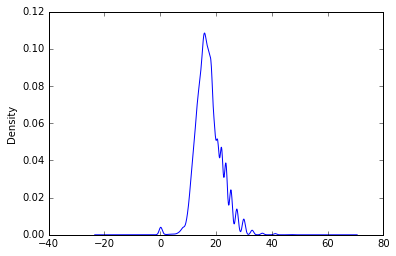

In [75]:
# Plotting density plot for barrels08
dfcleaned['barrels08'].plot(kind='kde')

##### Density plot: Time to charge an electric vehicle in hours at 240 V

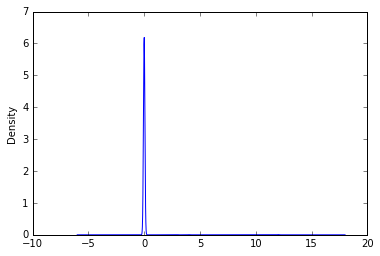

In [76]:
# Plotting density plot for charge120
dfcleaned['charge240'].plot(kind='kde')

##### Density plot: Rounded City MPG (city08)

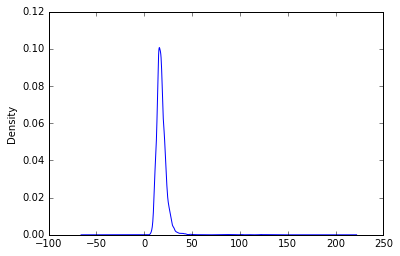

In [77]:
# Plotting density plot for city08
dfcleaned['city08'].plot(kind='kde')

##### Density plot: Annual Fuel Cost (fuelCost08) for Single Fuel Vehicles (fuelType1)

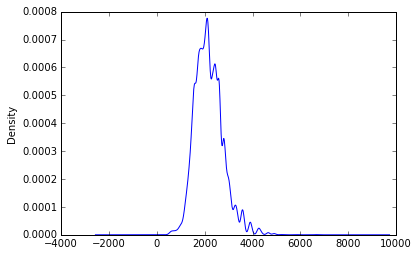

In [78]:
# Plotting density plot for city08
dfcleaned['fuelCost08'].plot(kind='kde')

##### Density plot: Annual Fuel Cost (fuelCostA08) for Dual Fuel Vehicles (fuelType2)

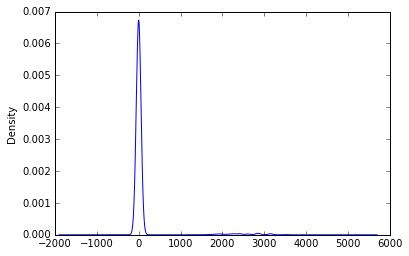

In [79]:
# Plotting density plot for city08
dfcleaned['fuelCostA08'].plot(kind='kde')

##### Density plot: Unadjusted City Miles Per Gallon for fuelType1 (UCity)

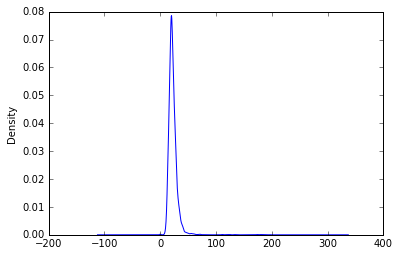

In [80]:
# Plotting density plot for UCity
dfcleaned['UCity'].plot(kind='kde')

##### Density plot: Unadjusted City Miles Per Gallon for fuelType2 (UCityA)

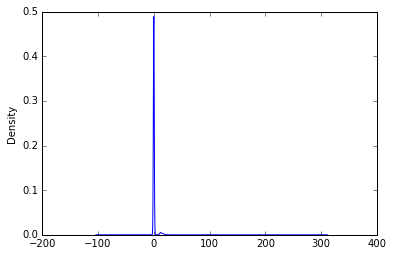

In [81]:
# Plotting density plot for UCityA
dfcleaned['UCityA'].plot(kind='kde')

##### Density plot: Unadjusted Highway MPG for fuelType1 (UHighway)

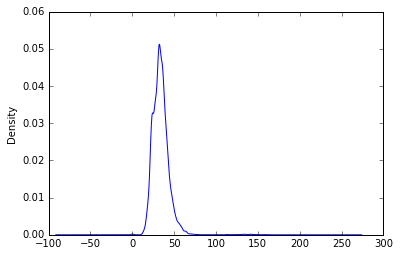

In [82]:
# Plotting density plot for UHighway
dfcleaned['UHighway'].plot(kind='kde')

##### Density plot: Unadjusted Highway MPG for fuelType2 (UHighwayA)

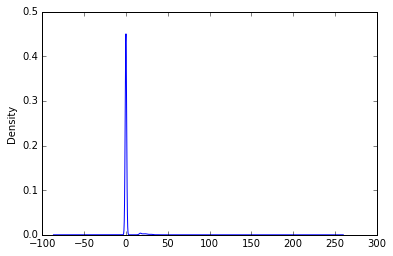

In [83]:
# Plotting density plot for UHighwayA
dfcleaned['UHighwayA'].plot(kind='kde')

#### Exploratory Analysis: Generating Aggregate Statistics and Basic Statistics Using Pandas

##### Generating aggregate statistics for cylinders

In [84]:
# Generating aggregate statistics for cylinders
dfcleaned.groupby('cylinders').describe()

UCity        UCityA      UHighway     UHighwayA  \
cylinders                                                                 
2.0       count     57.000000     57.000000     57.000000     57.000000   
          mean      22.585298     18.370570     32.518360     15.634839   
          std        9.741931     54.084597      6.147824     46.005077   
          min       18.000000      0.000000     28.205100      0.000000   
          25%       19.000000      0.000000     30.000000      0.000000   
          50%       19.000000      0.000000     30.769200      0.000000   
          75%       20.200000      0.000000     32.000000      0.000000   
          max       52.500000    181.560900     52.200000    152.187800   
3.0       count    257.000000    257.000000    257.000000    257.000000   
          mean      43.331580      2.118407     56.682008      1.978196   
          std        8.576238     15.128687      9.397434     14.078965   
          min       28.147800      0.000000     39.743600      0.000000   
          25%       37.000000      0.000000     50.000000      0.000000   
          50%       42.000000      0.000000     55.101100      0.000000   
          75%       49.000000      0.000000     63.000000      0.000000   
          max       68.188100    113.710200     89.202900    103.465500   
4.0       count  15260.000000  15260.000000  15260.000000  15260.000000   
          mean      27.681664      0.737984     39.967538      0.853263   
          std        6.354516      8.523339      7.742599      8.586715   
          min        0.000000      0.000000      0.000000      0.000000   
          25%       24.000000      0.000000     34.799950      0.000000   
          50%       26.548750      0.000000     39.200000      0.000000   
          75%       30.000000      0.000000     44.099625      0.000000   
          max       83.559800    207.262200     79.100000    173.143600   
5.0       count    769.000000    769.000000    769.000000    769.000000   
          mean      22.063143      0.000000     34.057392      0.000000   
          std        2.653822      0.000000      4.668819      0.000000   
          min       16.300000      0.000000     23.000000      0.000000   
          25%       20.000000      0.000000     30.600000      0.000000   
          50%       21.900000      0.000000     33.500000      0.000000   
...                       ...           ...           ...           ...   
8.0       std        2.822604      3.608065      5.195120      5.504362   
          min        0.000000      0.000000      0.000000      0.000000   
          25%       14.444400      0.000000     22.000000      0.000000   
          50%       16.411000      0.000000     25.098800      0.000000   
          75%       18.521800      0.000000     30.000000      0.000000   
          max       28.600000     97.695600     42.307700     94.943700   
10.0      count    161.000000    161.000000    161.000000    161.000000   
          mean      14.134988      0.000000     24.543393      0.000000   
          std        1.943852      0.000000      3.027450      0.000000   
          min       10.000000      0.000000     15.700000      0.000000   
          25%       12.950400      0.000000     23.200000      0.000000   
          50%       13.700000      0.000000     24.332500      0.000000   
          75%       15.700000      0.000000     26.700000      0.000000   
          max       19.000000      0.000000     31.332400      0.000000   
12.0      count    603.000000    603.000000    603.000000    603.000000   
          mean      13.424375      0.371009     23.226171      0.679528   
          std        1.862014      1.909772      3.158702      3.509276   
          min        7.000000      0.000000     13.000000      0.000000   
          25%       12.400000      0.000000     21.300000      0.000000   
          50%       13.723800      0.000000     23.331600      0.000000   
          75%       14.400000      0.000000     2

##### Generating Basic Statistics for Cylinders

In [85]:
# Generating basic statistics for cylinders
dfcleaned.cylinders.describe()

count    39599.000000
mean         5.725806
std          1.751677
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: cylinders, dtype: float64

##### Generating Basic Statistics for Engine Displacement

In [86]:
# Generating basic statistics for engine displacement 
dfcleaned.displ.describe()

count    39599.000000
mean         3.305614
std          1.357647
min          0.000000
25%          2.200000
50%          3.000000
75%          4.300000
max          8.400000
Name: displ, dtype: float64

##### Generating Aggregate Statistics for Engine Displacement

In [87]:
# Generating statistics aggregate statistics for engine displacement
dfcleaned.groupby('displ').describe()

UCity      UCityA    UHighway   UHighwayA   barrels08  \
displ                                                                     
0.0   count    1.000000    1.000000    1.000000    1.000000    1.000000   
      mean   180.525400    0.000000  140.987600    0.000000    0.180000   
      std           NaN         NaN         NaN         NaN         NaN   
      min    180.525400    0.000000  140.987600    0.000000    0.180000   
      25%    180.525400    0.000000  140.987600    0.000000    0.180000   
      50%    180.525400    0.000000  140.987600    0.000000    0.180000   
      75%    180.525400    0.000000  140.987600    0.000000    0.180000   
      max    180.525400    0.000000  140.987600    0.000000    0.180000   
0.6   count    6.000000    6.000000    6.000000    6.000000    6.000000   
      mean    50.606733  174.520417   49.839833  148.530967    1.404539   
      std      1.943090    7.746280    2.518712    4.171655    0.173846   
      min     48.670200  166.819900   47.169500  143.811200    1.238080   
      25%     48.802650  167.314925   47.477125  144.608400    1.249793   
      50%     50.650000  175.180450   50.150000  149.593900    1.406492   
      75%     52.400000  181.560900   52.125000  152.187800    1.563190   
      max     52.500000  181.560900   52.200000  152.187800    1.563190   
0.9   count    6.000000    6.000000    6.000000    6.000000    6.000000   
      mean    43.116667    0.000000   58.400000    0.000000    9.555920   
      std      1.486495    0.000000    0.843801    0.000000    0.151710   
      min     41.700000    0.000000   57.100000    0.000000    9.417429   
      25%     41.800000    0.000000   58.025000    0.000000    9.417429   
      50%     43.000000    0.000000   58.400000    0.000000    9.555920   
      75%     44.500000    0.000000   59.075000    0.000000    9.694412   
      max     44.600000    0.000000   59.300000    0.000000    9.694412   
1.0   count  171.000000  171.000000  171.000000  171.000000  171.000000   
      mean    46.284715    0.000000   59.030068    0.000000    9.103441   
      std      8.589634    0.000000   10.444657    0.000000    1.690109   
      min     23.000000    0.000000   28.000000    0.000000    6.219057   
      25%     41.000000    0.000000   51.000000    0.000000    8.240250   
      50%     45.000000    0.000000   58.545200    0.000000    9.155833   
...                 ...         ...         ...         ...         ...   
7.4   std      0.000000    0.000000    1.000000    0.000000    1.831167   
      min     11.000000    0.000000   14.000000    0.000000   32.961000   
      25%     11.000000    0.000000   15.500000    0.000000   32.961000   
      50%     11.000000    0.000000   16.000000    0.000000   32.961000   
      75%     11.000000    0.000000   16.000000    0.000000   33.876583   
      max     11.000000    0.000000   16.000000    0.000000   36.623333   
8.0   count   24.000000   24.000000   24.000000   24.000000   24.000000   
      mean    11.977425    0.000000   23.515025    0.000000   27.423139   
      std      1.799173    0.000000    4.382407    0.000000    4.276700   
      min      9.400000    0.000000   17.800000    0.000000   21.974000   
      25%     10.000000    0.000000   17.900000    0.000000   23.543571   
      50%     12.500000    0.000000   26.400000    0.000000   25.354615   
      75%     13.096325    0.000000   27.000000    0.000000   32.961000   
      max     15.000000    0.000000   28.000000    0.000000   32.961000   
8.3   count    9.000000    9.000000    9.000000    9.000000    9.000000   
      mean    11.680022    0.000000   21.377778    0.000000   30.193009   
      std      1.665835    0.000000    4.759669    0.000000    5.245577   
      min     10.000000    0.000000   15.700000    0.000000   23.543571   
      25%     10.473400    0.000000   18.700000    0.000000   25.354615   
      50%     10.473400    0.000000   18.700000    0.000000   32.961000   
      75%     13.400000    0.000000   25.90

##### Generating Basic Statistics for Rounded City MPG

In [88]:
# Generating basic statistics for rounded city MPG
dfcleaned.city08.describe()

count    39599.000000
mean        18.171823
std          7.331846
min          6.000000
25%         15.000000
50%         17.000000
75%         20.000000
max        150.000000
Name: city08, dtype: float64

##### Generating Basic Statistics for Annual Fuel Cost (fuelCost08) for Single Fuel Vehicles (fuelType1)

In [89]:
dfcleaned.fuelCost08.describe()

count    39599.000000
mean      2177.875704
std        590.851126
min        500.000000
25%       1750.000000
50%       2150.000000
75%       2600.000000
max       6650.000000
Name: fuelCost08, dtype: float64

##### Generating Aggregate Statistics for Annual Fuel Cost (fuelCost08) for Singlel Fuel Vehicles (fuelType1)

In [90]:
dfcleaned.groupby('fuelCost08').describe()

UCity  UCityA    UHighway  UHighwayA     barrels08  \
fuelCost08                                                                  
500        count    4.000000     4.0    4.000000        4.0  4.000000e+00   
           mean   207.825000     0.0  178.250000        0.0  1.545000e-01   
           std     19.891770     0.0    5.499394        0.0  5.744563e-03   
           min    186.700000     0.0  171.400000        0.0  1.500000e-01   
           25%    192.925000     0.0  175.000000        0.0  1.500000e-01   
           50%    209.900000     0.0  179.450000        0.0  1.530000e-01   
           75%    224.800000     0.0  182.700000        0.0  1.575000e-01   
           max    224.800000     0.0  182.700000        0.0  1.620000e-01   
550        count   22.000000    22.0   22.000000       22.0  2.200000e+01   
           mean   184.737945     0.0  154.321391        0.0  1.696364e-01   
           std      7.644283     0.0    3.762364        0.0  4.603782e-03   
           min    174.855500     0.0  146.358600        0.0  1.620000e-01   
           25%    179.325000     0.0  150.750000        0.0  1.680000e-01   
           50%    183.200000     0.0  155.229550        0.0  1.680000e-01   
           75%    188.408700     0.0  157.125000        0.0  1.740000e-01   
           max    197.577100     0.0  159.100000        0.0  1.740000e-01   
600        count   40.000000    40.0   40.000000       40.0  4.000000e+01   
           mean   170.635955     0.0  139.720510        0.0  1.864500e-01   
           std     12.200766     0.0    5.313237        0.0  5.665686e-03   
           min    134.700000     0.0  131.400000        0.0  1.800000e-01   
           25%    170.475000     0.0  133.200000        0.0  1.800000e-01   
           50%    173.800000     0.0  141.150000        0.0  1.860000e-01   
           75%    179.700000     0.0  144.600000        0.0  1.920000e-01   
           max    182.600000     0.0  147.800000        0.0  1.920000e-01   
650        count   25.000000    25.0   25.000000       25.0  2.500000e+01   
           mean   133.265028     0.0  132.456228        0.0  6.399145e-01   
           std     20.564878     0.0   16.446078        0.0  1.517773e+00   
           min     75.700000     0.0   79.100000        0.0  1.980000e-01   
           25%    132.100000     0.0  133.689800        0.0  1.980000e-01   
           50%    133.700000     0.0  135.600000        0.0  2.040000e-01   
...                      ...     ...         ...        ...           ...   
4900       std      0.408459     0.0    0.613303        0.0  7.222880e-15   
           min      8.000000     0.0   12.000000        0.0  4.120125e+01   
           25%      9.000000     0.0   12.820500        0.0  4.120125e+01   
           50%      9.000000     0.0   13.000000        0.0  4.120125e+01   
           75%      9.000000     0.0   14.000000        0.0  4.120125e+01   
           max     10.000000     0.0   14.000000        0.0  4.120125e+01   
5200       count    6.000000     6.0    6.000000        6.0  6.000000e+00   
           mean     9.614450     0.0   16.355567        0.0  3.662333e+01   
           std      0.461583     0.0    0.508018        0.0  0.000000e+00   
           min      8.888900     0.0   15.700000        0.0  3.662333e+01   
           25%      9.398900     0.0   15.941675        0.0  3.662333e+01   
           50%      9.699450     0.0   16.666700        0.0  3.662333e+01   
           75%     10.000000     0.0   16.691675        0.0  3.662333e+01   
           max     10.000000     0.0   16.700000        0.0  3.662333e+01   
5850       count    4.000000     4.0    4.000000        4.0  4.000000e+00   
           mean     8.334050     0.0   14.450000        0.0  4.120125e+01   
           std      0.425779     0.0    0.900000        0.0  0.000000e+00   
           min      8.000000     0.0   14.000000        0.0  4.120125e+01   
           25%      8.000000     0.0   14.000000        0.0  4.120125e+01   
           50%     

##### Generating Basic Statistics for Annual Fuel Cost (fuelCostA08) for Dual Fuel Vehicles (fuelType2)

In [91]:
dfcleaned.fuelCostA08.describe()

count    39599.00000
mean        90.25733
std        473.82431
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max       3800.00000
Name: fuelCostA08, dtype: float64

##### Generating Aggregate Statistics for Annual Fuel Cost (fuelCostA08) for Dual Fuel Vehicles (fuelType2)

In [92]:
dfcleaned.groupby('fuelCostA08').describe()

UCity        UCityA      UHighway     UHighwayA  \
fuelCostA08                                                                 
0           count  38146.000000  3.814600e+04  38146.000000  38146.000000   
            mean      23.049028  1.961805e-01     34.150392      0.198530   
            std       10.480418  4.891717e+00     10.781610      4.813307   
            min        0.000000  0.000000e+00      0.000000      0.000000   
            25%       18.300000  0.000000e+00     27.800000      0.000000   
            50%       21.357900  0.000000e+00     33.100000      0.000000   
            75%       25.800000  0.000000e+00     38.800000      0.000000   
            max      224.800000  2.072622e+02    182.700000    173.143600   
550         count      3.000000  3.000000e+00      3.000000      3.000000   
            mean      52.366667  1.815609e+02     52.100000    152.187800   
            std        0.230940  3.480934e-14      0.173205      0.000000   
            min       52.100000  1.815609e+02     51.900000    152.187800   
            25%       52.300000  1.815609e+02     52.050000    152.187800   
            50%       52.500000  1.815609e+02     52.200000    152.187800   
            75%       52.500000  1.815609e+02     52.200000    152.187800   
            max       52.500000  1.815609e+02     52.200000    152.187800   
600         count      6.000000  6.000000e+00      6.000000      6.000000   
            mean      53.773400  1.647900e+02     54.339833    142.987067   
            std        5.400286  3.034119e+00      7.419010      2.372555   
            min       48.670200  1.621000e+02     47.169500    141.100000   
            25%       48.802650  1.621000e+02     47.477125    141.100000   
            50%       53.950000  1.644599e+02     54.750000    142.455600   
            75%       58.700000  1.668199e+02     61.100000    143.811200   
            max       58.700000  1.688000e+02     61.100000    147.000000   
700         count      5.000000  5.000000e+00      5.000000      5.000000   
            mean      47.142420  1.409600e+02     53.369920    133.060000   
            std        0.968247  5.395183e+00      0.349462      0.328634   
            min       45.412100  1.350000e+02     52.749600    132.700000   
            25%       47.500000  1.351000e+02     53.500000    132.700000   
            50%       47.600000  1.449000e+02     53.500000    133.300000   
...                         ...           ...           ...           ...   
3150        std        0.893922  2.293602e+00      1.342024      3.484180   
            min       13.700000  0.000000e+00     20.400000      0.000000   
            25%       14.962250  1.070000e+01     22.400000     16.355550   
            50%       15.437800  1.100000e+01     22.932200     16.679900   
            75%       15.800000  1.130000e+01     24.600000     17.200000   
            max       17.400000  1.168520e+01     25.800000     18.540500   
3250        count      1.000000  1.000000e+00      1.000000      1.000000   
            mean      11.665500  1.113760e+01     15.614500     15.337300   
            std             NaN           NaN           NaN           NaN   
            min       11.665500  1.113760e+01     15.614500     15.337300   
            25%       11.665500  1.113760e+01     15.614500     15.337300   
            50%       11.665500  1.113760e+01     15.614500     15.337300   
            75%       11.665500  1.113760e+01     15.614500     15.337300   
            max       11.665500  1.113760e+01     15.614500     15.337300   
3500        count     50.000000  5.000000e+01     50.000000     50.000000   
            mean      12.904012  9.407182e+00     21.012572     15.468392   
            std        0.446853  2.469981e-01      1.061402      0.546806   
            min       12.000000  9.000000e+00     19.230800     14.594300   
            25%       12.605600  9.234825e+00     20.700000     15.300000   
            50%       

##### Generating Basic Statistics for Unadjusted Highway MPG for Fuel Type1

In [93]:
# Generating basic statistics for highway MPG for fuelType1 
dfcleaned.UHighway.describe()

count    39599.000000
mean        34.021939
std         10.724282
min          0.000000
25%         27.500000
50%         33.000000
75%         38.700000
max        182.700000
Name: UHighway, dtype: float64

##### Generating Aggregate Statistics for Unadjusted Highway MPG for FuelType1

In [94]:
# Generating aggregate statistics for unrounded highway MPG for fuelType1
dfcleaned.groupby('UHighway').describe()

UCity  UCityA  UHighwayA     barrels08  charge120  \
UHighway                                                                 
0.0000   count   25.000000    25.0       25.0  2.500000e+01       25.0   
         mean     0.000000     0.0        0.0  1.921776e+01        0.0   
         std      0.000000     0.0        0.0  1.159842e+01        0.0   
         min      0.000000     0.0        0.0  1.430769e-01        0.0   
         25%      0.000000     0.0        0.0  1.734789e+01        0.0   
         50%      0.000000     0.0        0.0  2.197400e+01        0.0   
         75%      0.000000     0.0        0.0  2.746750e+01        0.0   
         max      0.000000     0.0        0.0  2.996455e+01        0.0   
12.0000  count    2.000000     2.0        2.0  2.000000e+00        2.0   
         mean     9.000000     0.0        0.0  4.120125e+01        0.0   
         std      0.000000     0.0        0.0  0.000000e+00        0.0   
         min      9.000000     0.0        0.0  4.120125e+01        0.0   
         25%      9.000000     0.0        0.0  4.120125e+01        0.0   
         50%      9.000000     0.0        0.0  4.120125e+01        0.0   
         75%      9.000000     0.0        0.0  4.120125e+01        0.0   
         max      9.000000     0.0        0.0  4.120125e+01        0.0   
12.8205  count   12.000000    12.0       12.0  1.200000e+01       12.0   
         mean     9.166667     0.0        0.0  4.120125e+01        0.0   
         std      0.389249     0.0        0.0  7.421377e-15        0.0   
         min      9.000000     0.0        0.0  4.120125e+01        0.0   
         25%      9.000000     0.0        0.0  4.120125e+01        0.0   
         50%      9.000000     0.0        0.0  4.120125e+01        0.0   
         75%      9.000000     0.0        0.0  4.120125e+01        0.0   
         max     10.000000     0.0        0.0  4.120125e+01        0.0   
13.0000  count   18.000000    18.0       18.0  1.800000e+01       18.0   
         mean     8.765433     0.0        0.0  4.131025e+01        0.0   
         std      1.393985     0.0        0.0  4.192071e+00        0.0   
         min      7.000000     0.0        0.0  3.662333e+01        0.0   
         25%      7.250000     0.0        0.0  3.662333e+01        0.0   
         50%      8.944450     0.0        0.0  4.120125e+01        0.0   
...                    ...     ...        ...           ...        ...   
159.1000 std      0.000000     0.0        0.0  0.000000e+00        0.0   
         min    196.400000     0.0        0.0  1.620000e-01        0.0   
         25%    196.400000     0.0        0.0  1.620000e-01        0.0   
         50%    196.400000     0.0        0.0  1.620000e-01        0.0   
         75%    196.400000     0.0        0.0  1.620000e-01        0.0   
         max    196.400000     0.0        0.0  1.620000e-01        0.0   
171.4000 count    1.000000     1.0        1.0  1.000000e+00        1.0   
         mean   186.700000     0.0        0.0  1.620000e-01        0.0   
         std           NaN     NaN        NaN           NaN        NaN   
         min    186.700000     0.0        0.0  1.620000e-01        0.0   
         25%    186.700000     0.0        0.0  1.620000e-01        0.0   
         50%    186.700000     0.0        0.0  1.620000e-01        0.0   
         75%    186.700000     0.0        0.0  1.620000e-01        0.0   
         max    186.700000     0.0        0.0  1.620000e-01        0.0   
176.2000 count    1.000000     1.0        1.0  1.000000e+00        1.0   
         mean   195.000000     0.0        0.0  1.560000e-01        0.0   
         std           NaN     NaN        NaN           NaN        NaN   
         min    195.000000     0.0        0.0  1.560000e-01        0.0   
         25%    195.000000     0.0        0.0  1.560000e-01        0.0   
         50%    195.000000     0.0        0.0  1.560000e-01        0.0   
         75%    195.000000     0.0        0.0  1.560000e-01        0.0   
         max    195.00000

##### Generating Basic Statistics for Unadjusted Highway MPG for FuelType2

In [95]:
# Generating basic statistics for unrounded highway MPG for FuelType1
dfcleaned.UHighwayA.describe()

count    39599.000000
mean         1.054078
std          7.053914
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        173.143600
Name: UHighwayA, dtype: float64

##### Generating Aggregate Statistics for Unadjusted Highway MPG for FuelType2

In [96]:
# Generating aggregate statistics for unrounded highway MPG for FuelType1
dfcleaned.groupby('UHighwayA').describe()

UCity        UCityA      UHighway     barrels08  \
UHighwayA                                                                 
0.0000    count  38123.000000  3.812300e+04  38123.000000  3.812300e+04   
          mean      22.997656  0.000000e+00     34.103788  1.736165e+01   
          std       10.438988  0.000000e+00     10.783015  4.579644e+00   
          min        0.000000  0.000000e+00      0.000000  6.000000e-02   
          25%       18.273600  0.000000e+00     27.800000  1.433087e+01   
          50%       21.300000  0.000000e+00     33.095600  1.648050e+01   
          75%       25.702800  0.000000e+00     38.797500  1.938882e+01   
          max      224.800000  0.000000e+00    182.700000  4.708714e+01   
13.4555   count      1.000000  1.000000e+00      1.000000  1.000000e+00   
          mean      12.194900  8.861600e+00     17.542100  2.354357e+01   
          std             NaN           NaN           NaN           NaN   
          min       12.194900  8.861600e+00     17.542100  2.354357e+01   
          25%       12.194900  8.861600e+00     17.542100  2.354357e+01   
          50%       12.194900  8.861600e+00     17.542100  2.354357e+01   
          75%       12.194900  8.861600e+00     17.542100  2.354357e+01   
          max       12.194900  8.861600e+00     17.542100  2.354357e+01   
13.4698   count      1.000000  1.000000e+00      1.000000  1.000000e+00   
          mean      12.513300  9.100600e+00     17.562000  2.354357e+01   
          std             NaN           NaN           NaN           NaN   
          min       12.513300  9.100600e+00     17.562000  2.354357e+01   
          25%       12.513300  9.100600e+00     17.562000  2.354357e+01   
          50%       12.513300  9.100600e+00     17.562000  2.354357e+01   
          75%       12.513300  9.100600e+00     17.562000  2.354357e+01   
          max       12.513300  9.100600e+00     17.562000  2.354357e+01   
14.5943   count      2.000000  2.000000e+00      2.000000  2.000000e+00   
          mean      13.479100  9.790700e+00     19.230800  2.746750e+01   
          std        0.000000  0.000000e+00      0.000000  0.000000e+00   
          min       13.479100  9.790700e+00     19.230800  2.746750e+01   
          25%       13.479100  9.790700e+00     19.230800  2.746750e+01   
          50%       13.479100  9.790700e+00     19.230800  2.746750e+01   
...                       ...           ...           ...           ...   
150.0935  std             NaN           NaN           NaN           NaN   
          min       64.890100  1.771617e+02     65.449700  4.827657e+00   
          25%       64.890100  1.771617e+02     65.449700  4.827657e+00   
          50%       64.890100  1.771617e+02     65.449700  4.827657e+00   
          75%       64.890100  1.771617e+02     65.449700  4.827657e+00   
          max       64.890100  1.771617e+02     65.449700  4.827657e+00   
152.1878  count      3.000000  3.000000e+00      3.000000  3.000000e+00   
          mean      52.366667  1.815609e+02     52.100000  1.563190e+00   
          std        0.230940  3.480934e-14      0.173205  2.719480e-16   
          min       52.100000  1.815609e+02     51.900000  1.563190e+00   
          25%       52.300000  1.815609e+02     52.050000  1.563190e+00   
          50%       52.500000  1.815609e+02     52.200000  1.563190e+00   
          75%       52.500000  1.815609e+02     52.200000  1.563190e+00   
          max       52.500000  1.815609e+02     52.200000  1.563190e+00   
163.0000  count      1.000000  1.000000e+00      1.000000  1.000000e+00   
          mean      71.600000  1.757000e+02     72.300000  2.786425e+00   
          std             NaN           NaN           NaN           NaN   
          min       71.600000  1.757000e+02     72.300000  2.786425e+00   
          25%       71.600000  1.757000e+02     72.300000  2.786425e+00   
          50%       71.600000  1.757000e+02     72.300000  2.786425e+00   
          75%       71.600000  1.757000e+02     7

##### Density plot: Cylinders

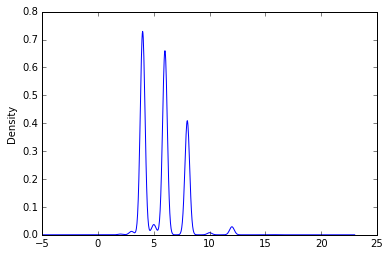

In [97]:
dfcleaned['cylinders'].plot(kind='kde')

##### Density plot: Engine Displacement

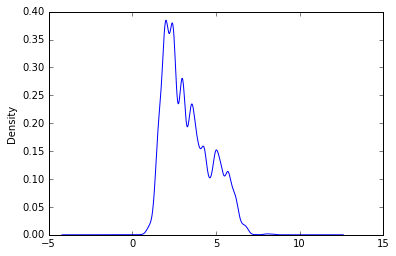

In [98]:
dfcleaned['displ'].plot(kind='kde')

##### Density plot: Highway MPG for fuelType1

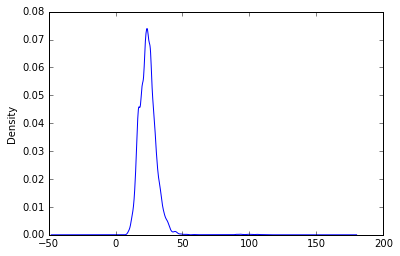

In [99]:
dfcleaned['highway08'].plot(kind='kde')

#### Plotting Histograms to see value frequency, distribution, and if data labels can be separated by certain attributes. 


##### Engine Cylinders Histogram is positively skewed.


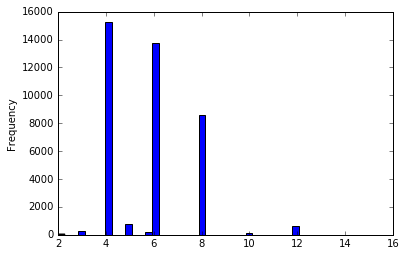

In [100]:
dfcleaned.cylinders.plot(bins=50, kind='hist')

##### Engine Displacement in Liters histogram is positively skewed

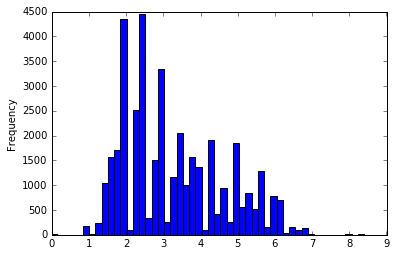

In [101]:
dfcleaned.displ.plot(bins=50, kind='hist')

#####  City MPG histogram is almost symmetric, though it leans more towards being positively skewed 


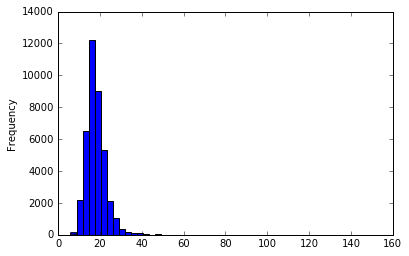

In [102]:
dfcleaned.city08.plot(bins=50, kind='hist')

##### Plotting Histogram for Annual Fuel Cost (fuelCost08) for Single Fuel Vehicles (fuelType1)

In [2]:
dfcleaned.fuelCost08.plot(bins=50, kind='hist')

NameError: name 'dfcleaned' is not defined

##### Plotting Histogram for Annual Fuel Cost (fuelCostA08) for Dual Fuel Vehicles (fuelType2)

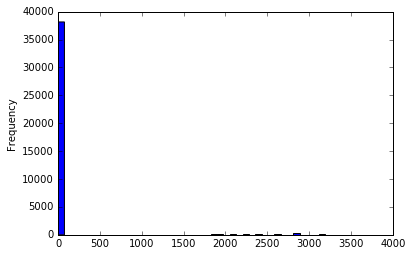

In [104]:
dfcleaned.fuelCostA08.plot(bins=50, kind='hist')

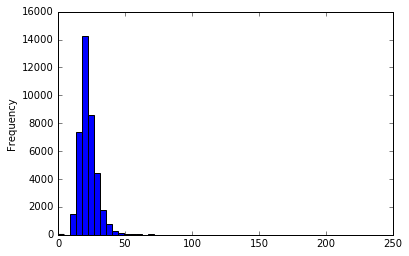

In [105]:
dfcleaned.UCity.plot(bins=50, kind='hist')

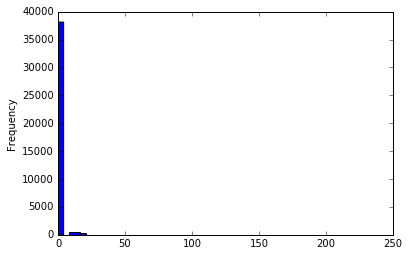

In [106]:
dfcleaned.UCityA.plot(bins=50, kind='hist')

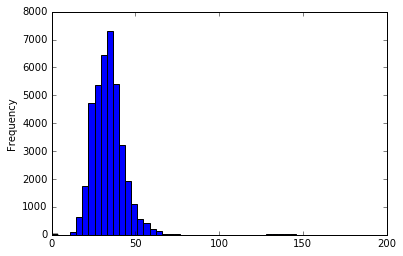

In [107]:
dfcleaned.UHighway.plot(bins=50, kind='hist')

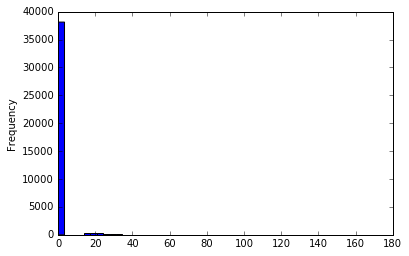

In [108]:
dfcleaned.UHighwayA.plot(bins=50, kind='hist')

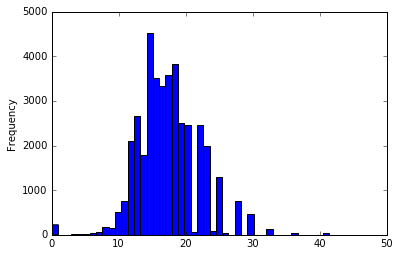

In [109]:
dfcleaned.barrels08.plot(bins=50, kind='hist')

##### Plotting Scatterplot Matrix and Interpretation of Results
barrels08 is normally distributed as shown in the first bar chart (top-left).
UCity and UHighway show a linear relationship in that as the city MPGs increase, so does the highway MPGs also.

There is a negative relationship between engine displacement (displ) and unadjustedCityMPG (UCity), which makes sense in that as the engine size increases, so does the fuel consumption, hence the decrease in city miles per gallon (unadjustedCityMPG).

Also, there is a negative relationship between engine displacement (displ) and unadjusted highway MPG (UHighway). The same reasoning again is that as the engine size increases, so does the fuel consumption, hence the decrease in unadjusted highway miles per gallon (UHighway).

There is a linear relationship between annual petroleum consumption in barrels for fuel Type 1 (barrels08) and engine displacement (displ). As the engine displacement of engine size increases, so does the petroleum consumption. There are some outliers though in the displ scatter matrix.

There is a similar linear relationship between cylinders (for 2, 4, and 6 cylidners) and both UCity mileage and UHighway mileage. 2, 4 and 6 cylinders appear to have an incremental city mileage and highway mileage. 6 cylinders appear to have a peak city and highway mileage. As the engine cylinders increase from 8 to 16, there is a negative relation between cylinders and both city mileage (UCity) and highway (UHighway) mileage. 


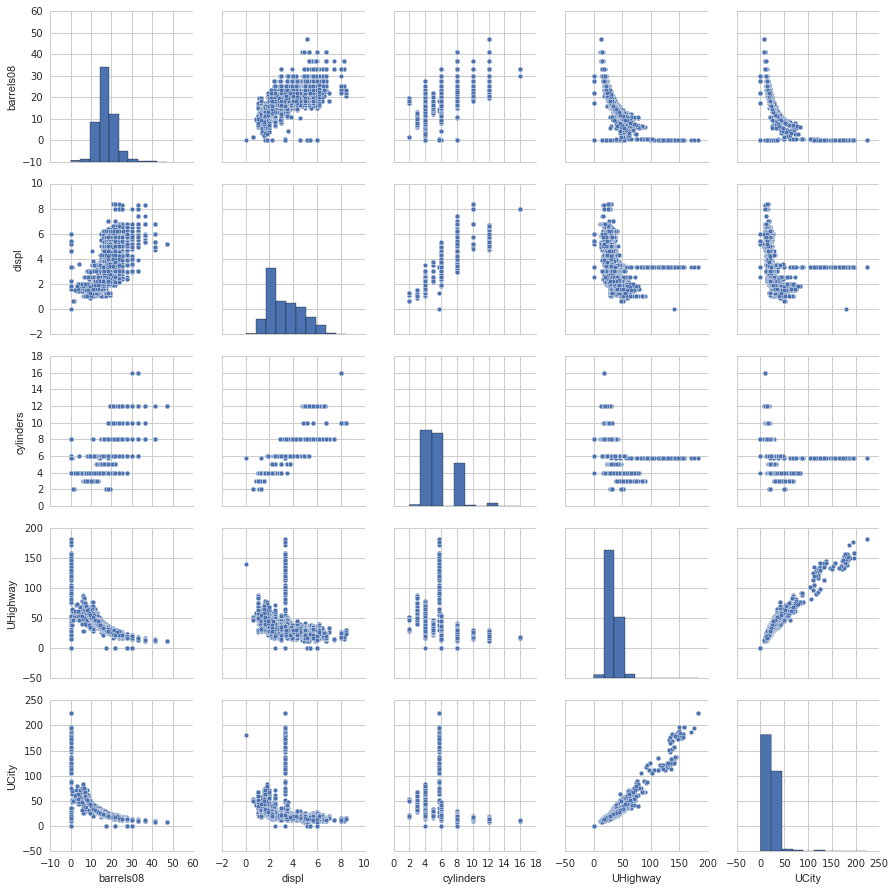

In [110]:
# Plotting Scatter plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['barrels08', 'displ', 'cylinders', 'UHighway', 'UCity']
sns.pairplot(dfcleaned[cols], size=2.5);
plt.show()

##### Plotting Correlation Matrix Array As A Heat Map:

Using NumPy's corrcoef function previously visualized in scatterplot matrix (barrels08, displ, cylinders, UHighway, UCity), to plot correlation matrix as a heat map using seaborn's heat map function. 

Interpretation of correlation matrix using NumPy according to Raschka:

Correlation matrix is a square matrix that contains the Pearson product-moment correlation coefficients (abbreviated as Pearson's r), which measures the linear dependence between pairs of features.

Looking at correlation coefficient bounds in range (r) -1 and 1. If r = 1, then two features have a perfect positive correlation, r = 0, means no correlation, and r = -1, means perfect negative correlation. 

Graph presents a visual correlation matrix in a summarized graphical manner, which provides capability to select features that have a high correlation (high score) based on their respective linear correlations. 

Annual petroleum consumption in barrels for single fuel vehicles (barrels08) and unadjusted cityMPG for single fuel vehicles (UCity) have a low correlation score of -0.89 based on the heat map. Referencing back to the scatter plot, barrels and UCity have a negative relationship (non linear relationship). So, barrels08 is not good input independent variables based on the low score and non linear relationship.

Engine Displacement in liters (displ) and unadjusted cityMPG for single fuel vehicles (UCity) have a low correlation matrix of -0.74 based on the heat map. Looking back at the scatter plot, there is a negative relationship between engine displacement (displ) and unadjustedCityMPG for single fuel vehicles (UCity), makes sense, as the engine size increases, so does the fuel consumption, hence the decrease in city miles per gallon (unadjustedCityMPG).

There is a somehow moderate correlation score of 0.80 between Engine Cylinders (cylinders) and Annual petroleum consumption in barrels for single fuel vehicles (barrels08) based on the heat map. Looking at the scatter plot, there is linear relationship between Engine Cylinders (cylinders) and Annual petroleum consumption in barrels for single fuel vehicles (barrels08).

Engine Displacement (displ) and Annual petroleum consumption in barrels for single fuel vehicles (barrels08) have a somehow moderate correlation score of 0.85 based on the heat map. Looking at the scatter plot, there is linear relationship between the two. Whilst Engine Displacement (displ) is not a good input variable for unadjustedCityMPG for single fuel vehicles (UCity), it would be good input variable for both Engine Cylinders (cylinders) and Annual petroleum consumption in barrels for single fuel vehicles (barrels08) if the two were targets or output variables.

UHighway and UCity have a strong correlation score of 0.91 based on the heat map. Looking at the scatter plot, there is also a linear relationship between unadjusted highway mpg for single fuel vehicles (UHighway) and unadjustedCityMPG for single fuel vehicles (UCity) (target variable). So, these two features are good candidates based on their strong correlation.


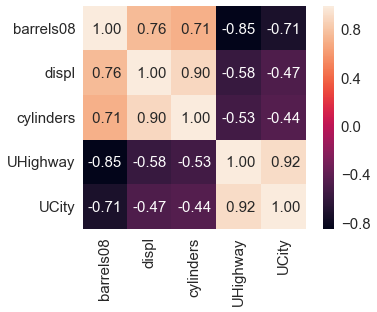

In [111]:
import numpy as np
cm = np.corrcoef(dfcleaned[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=' .2f', annot_kws={'size': 15}, 
                yticklabels=cols, xticklabels=cols)
plt.show()

##### Plotting Scatterplot Matrix and Interpretation of Results
Purpose: Provides capability to visualize pair-wise correlations between different features in the dataset in one place.

Interpretation: There is a strong positive linear relationship between Combined MPG for single fuel vehicles (comb08) and unadjusted cityMPG for single fuel vehicles (UCity), .

There is also a linear relationship between years and unadjusted cityMPG (UCity) in that as the years progress, so is the technology. Between 1985 and 1995 the unadjusted cityMPG was constant or flat. After 1995, there has been some increases in unadjusted cityMPG, which somehow makes sense given the advances in technology regarding fuel-efficient-vehicles such as highbreed vehicles.

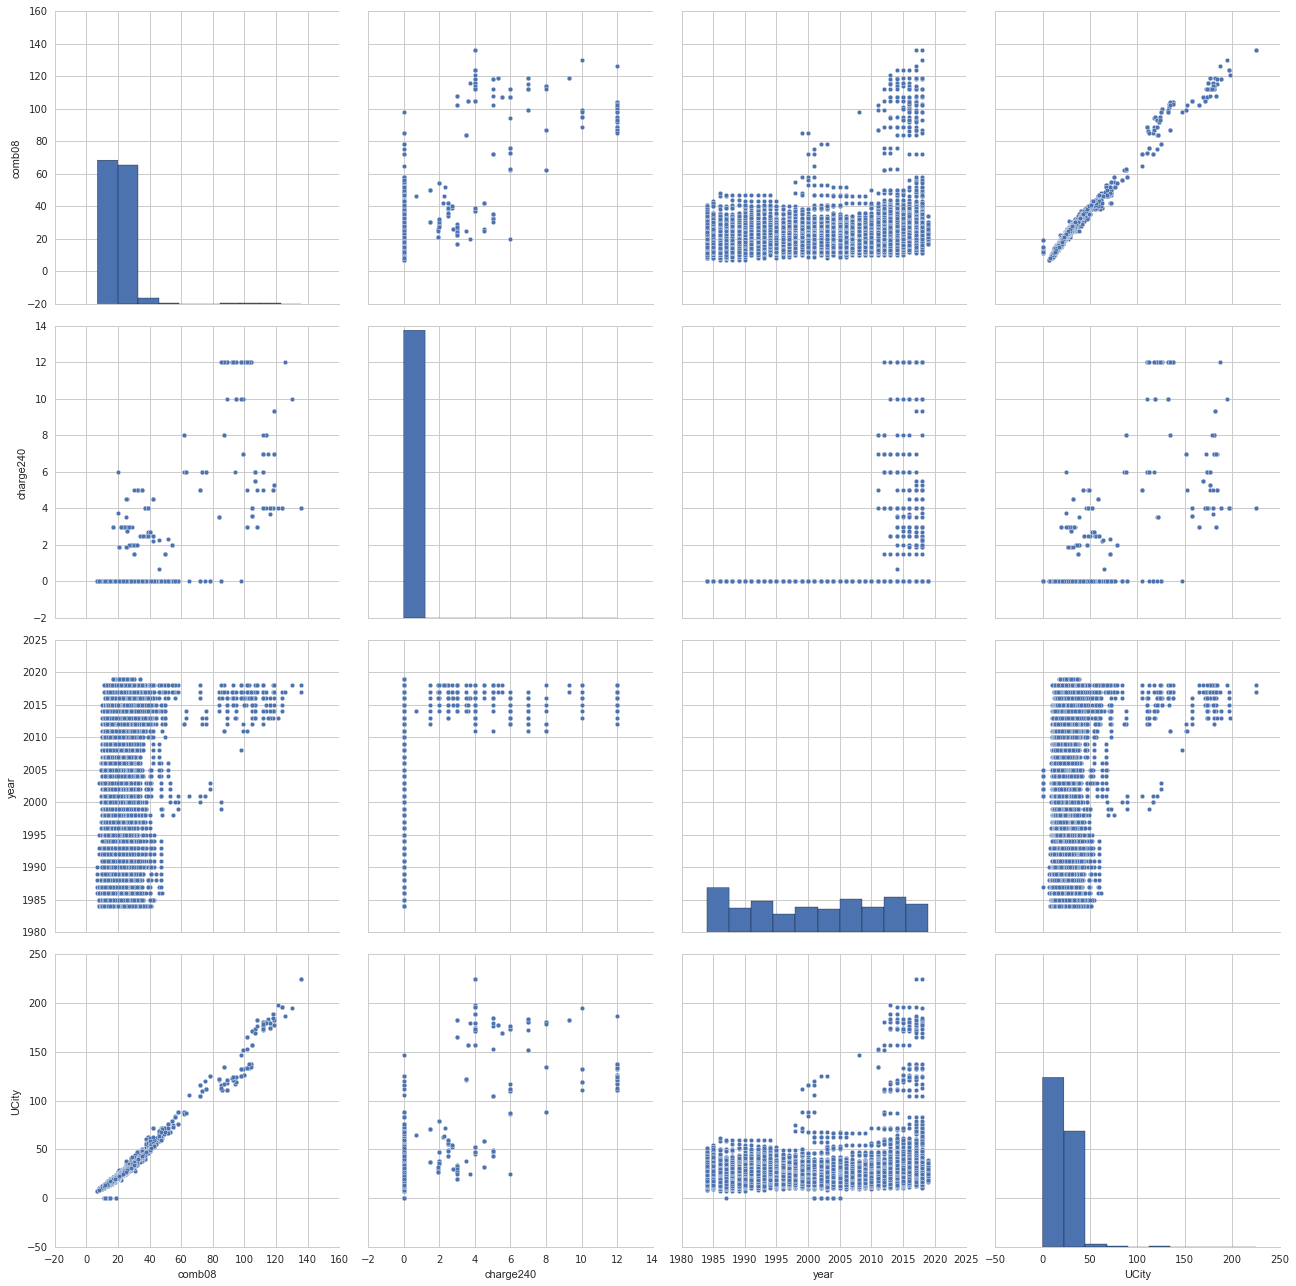

In [112]:
# Plotting Scatter plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['comb08', 'charge240', 'year', 'UCity']
sns.pairplot(dfcleaned[cols], size=4.5);
plt.show()

##### Plotting Correlation Matrix Array as a Heat Map to allow selection of features with high correlation based on linear correlations:

Using NumPy's corrcoef function previously visualized in scatterplot matrix (comb08, charge240, year, and UCity), to plot correlation matrix as a heat map using seaborn's heat map function. 

Interpretation of correlation matrix:
Correlation matrix is a square matrix that contains the Pearson product-moment correlation coefficients (abbreviated as Pearson's r), which measures the linear dependence between pairs of features.

Looking at correlation coefficient bounds in range (r) -1 and 1. If r = 1, then two features have a perfect positive correlation, r = 0, means no correlation, and r = -1, means perfect negative correlation.

Combined MPG for single fuel vehicles (comb08) and unadjusted cityMPG for single fuel vehicles (UCity), the target variable, have a strong correlation score of 0.97 based on the heat map. Also, looking at the scatter plot, there is also a linear relationship between comb08 and UCity. This makes these two features better candidates for regression analysis. 


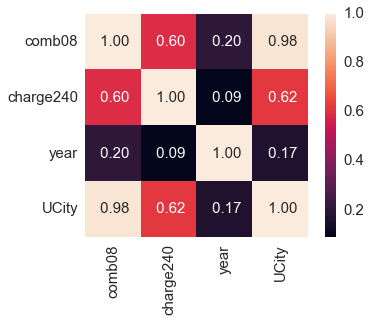

In [113]:
# Plotting correlation matrix as a heat map to use as a feature selection criteria.
# Combined MPG for single fuel vehicles (comb08) and unadjusted cityMPG for single fuel vehicles (UCity), the target 
#variable, have a strong correlation score of 0.97 based on the heat map. Also, looking at the scatter plot, there 
#is also a linear relationship between the two features. This makes these two features better candidates for later 
#plotting the Neural Network Regression plot. 

import numpy as np
cm = np.corrcoef(dfcleaned[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=' .2f', annot_kws={'size': 15}, 
                yticklabels=cols, xticklabels=cols)
plt.show()

##### Plotting Scatterplot Matrix to visualize pair-wise correlation between different features in the dataset in one place.

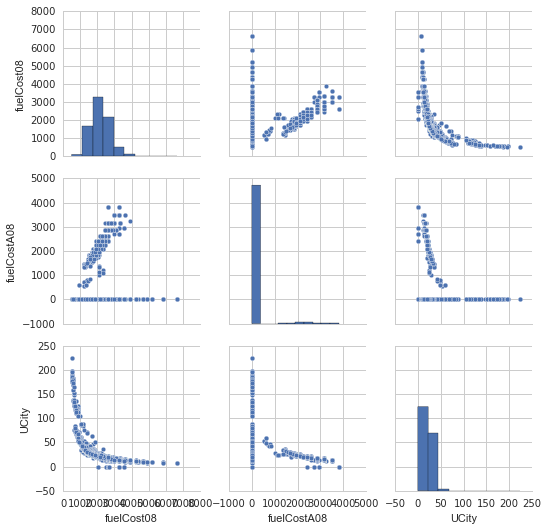

In [114]:
# Plotting Scatter plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
#cols = ['fuelCost08', 'fuelCostA08', 'fuelType1', 'fuelType2', 'UCity']
cols = ['fuelCost08', 'fuelCostA08', 'UCity']
sns.pairplot(dfcleaned[cols], size=2.5);
plt.show()

##### Plotting Correlation Matrix Array as a Heat Map to allow selection of features with high correlation based on linear correlations:

Using NumPy's corrcoef function previously visualized in scatterplot matrix ('fuelCost08', 'fuelCostA08', 'UCity'), to plot correlation matrix as a heat map using seaborn's heat map function. 

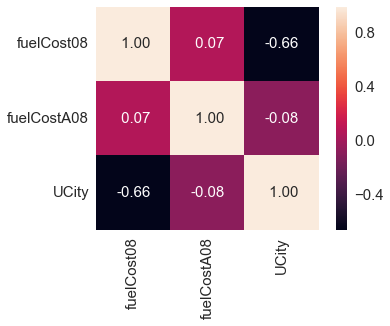

In [115]:
# Plotting correlation matrix as a heat map.
import numpy as np
cm = np.corrcoef(dfcleaned[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=' .2f', annot_kws={'size': 15}, 
                yticklabels=cols, xticklabels=cols)
plt.show()

##### Plotting Scatterplot Matrix and Interpretation to visualize pair-wise correlations between different features in the dataset in one place.
Interpretation: 
There is a strong positive linear relationship between the following features:
Rounded cityMPG for single fuel vehicles  (city08) and unadjusted cityMPG for single fuel vehicles (UCity).
Unrounded cityMPG for single fuel vehicles (city08U) and unadjusted cityMPG for single fuel vehicles (UCity).
Rounded Highway MPG for single fuel vehicles (highway08) and unadjusted cityMPG for single fuel vehicles (UCity).


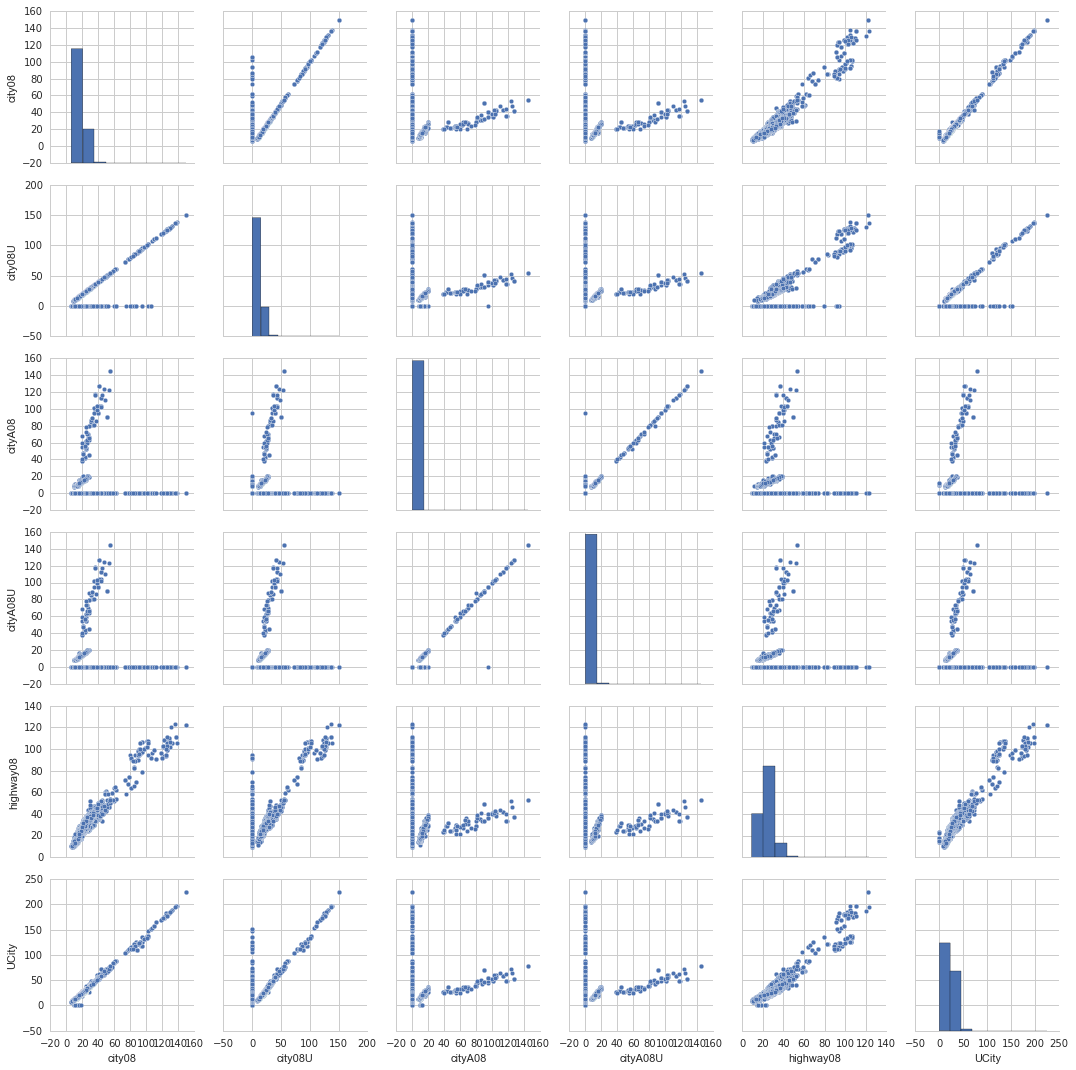

In [116]:
# Plotting Scatter plots to visualize pair-wise correlations between different features in the dataset in one place.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['city08', 'city08U', 'cityA08','cityA08U','highway08','UCity']
sns.pairplot(dfcleaned[cols], size=2.5);
plt.show()

##### Plotting Correlation Matrix Array as a Heat Map to allow selection of features with high correlation based on linear correlations:
Using NumPy's corrcoef function previously visualized in scatterplot matrix ('city08', 'city08U', 'cityA08','cityA08U','highway08','UCity'), to plot correlation matrix as a heat map using seaborn's heat map function. 

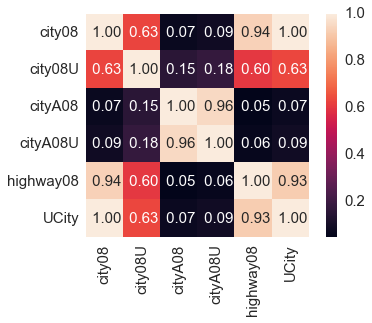

In [117]:
# Plotting correlation matrix as a heat map.
import numpy as np
cm = np.corrcoef(dfcleaned[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=' .2f', annot_kws={'size': 15}, 
                yticklabels=cols, xticklabels=cols)
plt.show()

In [118]:
# Resetting seaborn's style settings back to the matplotlib settings
#sns.reset_orig()

##### Defining Dataframe dfcleaningReg for Multi-Layer Perceptrons Regression Analysis

In [119]:
# Assigning dataframe dfcleaned to the dataframe dfcleanedReg for Multi-Layer Perceptrons Regression analysis.
dfcleanedReg = dfcleaned

In [120]:
# Displaying headers
dfcleanedReg.head()

,barrels08,charge120,charge240,city08,city08U,cityA08,cityA08U,comb08,cylinders,displ,...,make,model,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend
0,15.695714,0.0,0.0,19,0.0,0,0.0,21,4.0,2.0,...,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2000
1,29.964545,0.0,0.0,9,0.0,0,0.0,11,12.0,4.9,...,Ferrari,Testarossa,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-10500
2,12.207778,0.0,0.0,23,0.0,0,0.0,27,4.0,2.2,...,Dodge,Charger,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0
3,29.964545,0.0,0.0,10,0.0,0,0.0,11,8.0,5.2,...,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-10500
4,17.347895,0.0,0.0,17,0.0,0,0.0,19,4.0,2.2,...,Subaru,Legacy AWD Turbo,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5000


In [121]:
# Printing columns
print dfcleanedReg.columns

Index([u'barrels08', u'charge120', u'charge240', u'city08', u'city08U',
       u'cityA08', u'cityA08U', u'comb08', u'cylinders', u'displ',
       u'fuelCost08', u'fuelCostA08', u'fuelType', u'fuelType1', u'highway08',
       u'make', u'model', u'trany', u'UCity', u'UCityA', u'UHighway',
       u'UHighwayA', u'VClass', u'year', u'youSaveSpend'],
      dtype='object')


##### Checking Feature or Attribute Data Types

In [122]:
# Checking Datatypes for Features or Attributes, One at a time.
dfcleanedReg.barrels08.dtype

dtype('float64')

In [123]:
dfcleanedReg.charge120.dtype

dtype('float64')

In [124]:
dfcleanedReg.charge240.dtype

dtype('float64')

In [125]:
dfcleanedReg.city08.dtype

dtype('int64')

In [126]:
dfcleanedReg.city08U.dtype

dtype('float64')

In [127]:
dfcleanedReg.cityA08.dtype

dtype('int64')

In [128]:
dfcleanedReg.cityA08U.dtype

dtype('float64')

In [129]:
dfcleanedReg.comb08.dtype

dtype('int64')

In [130]:
dfcleanedReg.cylinders.dtype

dtype('float64')

In [131]:
dfcleanedReg.displ.dtype

dtype('float64')

In [132]:
dfcleanedReg.fuelCost08.dtype

dtype('int64')

In [133]:
dfcleanedReg.fuelCostA08.dtype

dtype('int64')

In [134]:
dfcleanedReg.fuelType.dtype

dtype('O')

In [135]:
dfcleanedReg.fuelType1.dtype

dtype('O')

In [136]:
dfcleanedReg.highway08.dtype

dtype('int64')

In [137]:
dfcleanedReg.make.dtype

dtype('O')

In [138]:
dfcleanedReg.model.dtype

dtype('O')

In [139]:
dfcleanedReg.trany.dtype

dtype('O')

In [140]:
dfcleanedReg.UCity.dtype

dtype('float64')

In [141]:
dfcleanedReg.UCityA.dtype

dtype('float64')

In [142]:
dfcleanedReg.UHighway.dtype

dtype('float64')

In [143]:
dfcleanedReg.UHighwayA.dtype

dtype('float64')

In [144]:
dfcleanedReg.VClass.dtype

dtype('O')

In [145]:
dfcleanedReg.year.dtype

dtype('int64')

##### Dropping Columns from DataFrame dfcleanedReg Not Needed for Multilayered Perceptrons Regression

In [146]:
# Dropping columns one at a time from DataFrame dfcleanedReg not needed for Multilayered Perceptrons for Regression.
for col in dfcleanedReg.columns:
    if 'charge120' in col:
        del dfcleanedReg[col]

In [147]:
#for col in dfcleanedReg.columns:
  # if 'fuelType' in col:
    #    del dfcleanedReg[col]

In [148]:
#for col in dfcleanedReg.columns:
 #   if 'fuelType1' in col:
    #    del dfcleanedReg[col]

In [149]:
#for col in dfcleanedReg.columns:
 #   if 'make' in col:
        #del dfcleanedReg[col]

In [150]:
#for col in dfcleanedReg.columns:
 #   if 'model' in col:
        #del dfcleanedReg[col]

In [151]:
#for col in dfcleanedReg.columns:
 #   if 'trany' in col:
       # del dfcleanedReg[col]

In [152]:
for col in dfcleanedReg.columns:
    if 'VClass' in col:
        del dfcleanedReg[col]

In [153]:
# Displaying remaining columns in dfcleanedReg dataframe.
print dfcleanedReg.columns

Index([u'barrels08', u'charge240', u'city08', u'city08U', u'cityA08',
       u'cityA08U', u'comb08', u'cylinders', u'displ', u'fuelCost08',
       u'fuelCostA08', u'fuelType', u'fuelType1', u'highway08', u'make',
       u'model', u'trany', u'UCity', u'UCityA', u'UHighway', u'UHighwayA',
       u'year', u'youSaveSpend'],
      dtype='object')


##### Importing Cross_Validation & Preprocessing
Preprocessing on training set data, and then transformations to both training and test set applied.
Cross_validation applied to measure the predictive performance of a statistical model, by testing it on data not used in estimation. Predictive accuracy of model measured by the mean squared error on the test set (will generally be larger than MSE on training set because test data were not used for estimation).

##### The Neural Networks were run in the background using Theano, which are more sophisticated Python libraries built on top of NumPy.
Theano used to construct deep neural networks to train complex Multi-layer Artificial Neural Networks efficiently.
Random_state parameter allows shuffling training data before each epoch, optimizes cost function, and allows consistency. 

In [154]:
#Importing Cross_Validation & Preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

#np.random.seed = 47
np.random.seed = 0
dfcleanedReg.head()

,barrels08,charge240,city08,city08U,cityA08,cityA08U,comb08,cylinders,displ,fuelCost08,...,highway08,make,model,trany,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend
0,15.695714,0.0,19,0.0,0,0.0,21,4.0,2.0,1850,...,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,23.3333,0.0,35.0000,0.0,1985,-2000
1,29.964545,0.0,9,0.0,0,0.0,11,12.0,4.9,3550,...,14,Ferrari,Testarossa,Manual 5-spd,11.0000,0.0,19.0000,0.0,1985,-10500
2,12.207778,0.0,23,0.0,0,0.0,27,4.0,2.2,1450,...,33,Dodge,Charger,Manual 5-spd,29.0000,0.0,47.0000,0.0,1985,0
3,29.964545,0.0,10,0.0,0,0.0,11,8.0,5.2,3550,...,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,12.2222,0.0,16.6667,0.0,1985,-10500
4,17.347895,0.0,17,0.0,0,0.0,19,4.0,2.2,2450,...,23,Subaru,Legacy AWD Turbo,Manual 5-spd,21.0000,0.0,32.0000,0.0,1993,-5000


##### Preprocessed Data by Standardizing Each Feature Using Scikit-learn StandardScaler. Used train_test_split function from scikit-learn's cross_validation module to:
(1) Randomnly partion data by splitting X and y arrays into 20 percent test data and 80 percent training data.

(2) Splitting datasets into separate training and testing datasets provides capability to evaluate how well a model performs on unseen data.

In [155]:

# Preprocessed Data by Standardizing Each Feature Using Scikit-learn StandardScaler. Used train_test_split function 
#from scikit-learn's cross_validation module to:
#(1) Randomnly partioned data by splitting X and y arrays into 20 percent test data and 80 percent training data.[10]
#(2) Splitting datasets into separate training and testing datasets provides capability to evaluate how well a model 
#performs on unseen data. [10]
#(3) Preprocessed Data by Standardizing Each Feature Using Scikit-learn StandardScaler so that features have the 
#same scale when they pass through individual units. 
#Cross_validation is the primary way of measuring the predictive performance of a statistical model. 

# Sources:
# [10]. Source: Sebastian Raschka, "Python Machine Learning", PACKT Publishing Ltd., Livery Place, 35 Livery Street, 
# Birmingham B3 2PB, UK, 2016, ISBN 978-1-78355-513-0, first published Sept 2015, page 51 (76 of 454)
# [37] Chris Albon, “Machine Leaning with Python Cookbook, Practical Solution from Preprocessing to Deep Learning,” 
# O’Reilly Media, Inc., 1005 Gravenstein Highway North, Sebastopol, CA 95472, ISBN 9781491989388, first published 2018-03-09, pages 298-299.


X = np.array(dfcleanedReg['comb08']).reshape(-1,1)
#X = np.array(dfcleanedReg['cylinders']).reshape(-1,1)
y = np.array(dfcleanedReg['UCity'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
X, y, test_size=0.2, random_state=9)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled = stdscaler.transform(X_test)


C:\Users\dunzz2001\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dunzz2001\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dunzz2001\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


##### Optimizaters, Activation Function & Addressing Overfitting 

In [156]:
#Used Linear activation function (this is a linear problem, output is contineous numeric value).
#Keras Python library used to train and evaluate the neural networks. 
#Stochastic gradient descent (SGD) defined as the optimizer to minimize the loss function. 
#Activation function rectified linear unit (relu or ReLU) used to addresses errors /overfitting the training data.
#Sigmoid (Logistic)activation function is a non-linear activation function more suitable for classification.
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD


# Stochastic Logistic Regression
model = Sequential()


model.add(Dense(output_dim=5, input_shape=[X_train_scaled.shape[1]], 
                 activation='relu'))
#model.add(Dense(output_dim2, activation='sigmoid'))
model.add(Dense(output_dim=1, activation='linear'))
#model.add(Dense(output_dim=1, activation='sigmoid'))


# Compile model
sgd = SGD(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=sgd)
#model.compile(loss='binary_crossentropy', optimizer=sgd)

Using Theano backend.


##### Fitting the Model and setting batch size or number of observations per batch

In [157]:
# Fitting the Model and setting batch size, which is the number of observations per batch.

history = model.fit(X_train_scaled, y_train.reshape(-1,1), batch_size = 256, 
                    nb_epoch = 50, verbose=5,validation_data=(X_test_scaled,y_test.reshape(-1,1)))

Train on 31679 samples, validate on 7920 samples
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


##### Plotting Root Mean Squared Error (RMSE) & Multi-layer Perceptron (MLP) Model Loss plot
Executing the algorithm will print the RMSE (Root Mean Square Error) for the trained model on the trained dataset. 
Mean square error (MSE) is the mean squared difference between true target function values and model predictions. This Difference to be minimized, termed mean square error minimization. 
The loss function measures how well a predictive value matches the true value. 
The model converged as it got close to 20,000 epochs (passes over the training dataset), confirming that there was minimization of the mean square error and that the model fit the training data. 

RMSE Loss after final iteration:  1.35986903616


<function matplotlib.pyplot.show>

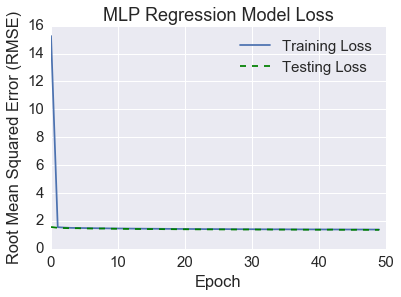

In [159]:
# Plotting Root Mean Squared Error (RMSE), difference between true target function values and model predictions.
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
#Summary history for loss
plt.plot(np.sqrt(history.history['loss']))
plt.plot(np.sqrt(history.history['val_loss']), 'g--')
plt.title('MLP Regression Model Loss')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "RMSE Loss after final iteration: ", np.sqrt(history.history['val_loss'][-1])
plt.show

##### Plotting Neural Network Regression ran in the background using Theano, which are more sophisticated Python libraries built on top of NumPy

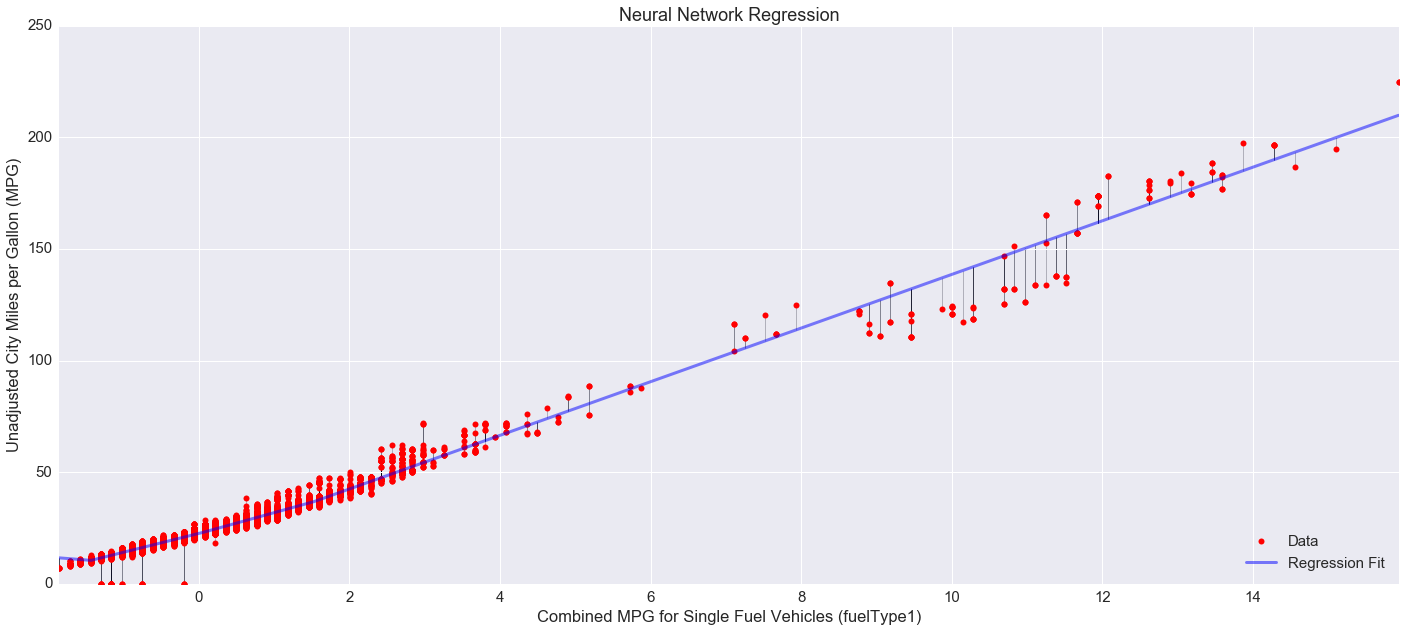

In [160]:
# Plotting Neural Network Regression. 
# Plot shows how well regression line fits the training data. 
from matplotlib.collections import LineCollection

y_predicted = model.predict(X_train_scaled)
N = len(y_train)

segments = [[[X_train_scaled[i], y_train[i]], [X_train_scaled[i], y_predicted[i]]] for i in range(N)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y_train)))
lc.set_alpha(0.5)
lc.set_linewidths(0.5 * np.ones(len(y_train)))

fig = plt.figure(figsize=[24,10])
# Plotting the training data
plt.plot(X_train_scaled, y_train, 'r.', markersize=12)
# Plotting the prediction line
x_lin = np.linspace(X_train_scaled.min(),X_train_scaled.max(),1000).reshape(-1,1)
plt.plot(x_lin, model.predict(x_lin), color='blue',linewidth=3,alpha=0.5)
# Plotting the residuals
plt.gca().add_collection(lc)

plt.xlim([X_train_scaled.min(),X_train_scaled.max()])
#plt.xlabel('Time Period in Years')
plt.xlabel('Combined MPG for Single Fuel Vehicles (fuelType1)')
#plt.xlabel('Engine Cylinders')
#plt.xlabel('Annual Fuel Cost(fuelCost08) for Single Fuel Vehicles(fuelType1)')
plt.ylabel('Unadjusted City Miles per Gallon (MPG)')
plt.legend(('Data', 'Regression Fit'), loc='lower right')
plt.title('Neural Network Regression')

# Plotting the regression line
plt.show()


##### Interpretation of Results After Plotting Neural Network Regression:

A plot for the Neural Network Regression shows that the training data is fitting well with the regression line. Because the regression line is fitting closely to the training data, the model is fitting. This is also supported by the small Root Mean Square Error Loss (RMSE) after final iteration, which is at 1.64059179816. The regression line shows a trend that Unadjusted City Miles per Gallon (UCity) tend to increase with Combined MPG for Single Fuel Vehicles (comb08).

######  End Training Artificial Neural Networks for City Fuel Efficiency Analysis in Miles Per Gallon (MPG) - Initial Analysis

#### Creating Dataframe dfcleanedTrfmd To Hold Data With Transformations To View Trend Analysis As a Balancing Equilizer

In [ ]:
#### importing ggplot package 
import pandas as pd
import numpy as np
from ggplot import *
%matplotlib inline

In [162]:
# Checking version of Pandas installed
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 2.7.12.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 58 Stepping 9, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None

pandas: 0.18.1
nose: 1.3.7
pip: 10.0.1
setuptools: 27.2.0
Cython: 0.24
numpy: 1.11.1
scipy: 0.17.1
statsmodels: 0.6.1
xarray: None
IPython: 4.2.0
sphinx: 1.4.1
patsy: 0.4.1
dateutil: 2.5.3
pytz: 2016.4
blosc: None
bottleneck: 1.1.0
tables: 3.2.2
numexpr: 2.6.0
matplotlib: 1.5.3
openpyxl: 2.3.2
xlrd: 1.0.0
xlwt: 1.1.2
xlsxwriter: 0.9.2
lxml: 3.6.0
bs4: 4.4.1
html5lib: None
httplib2: None
apiclient: None
sqlalchemy: 1.0.13
pymysql: None
psycopg2: None
jinja2: 2.8
boto: 2.40.0
pandas_datareader: None


In [163]:
#Creating Dataframe dfcleanedTrfmd To Hold Data With Transformations 
dfcleanedTrfmd = dfcleanedReg

In [164]:
dfcleanedTrfmd.head()

,barrels08,charge240,city08,city08U,cityA08,cityA08U,comb08,cylinders,displ,fuelCost08,...,highway08,make,model,trany,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend
0,15.695714,0.0,19,0.0,0,0.0,21,4.0,2.0,1850,...,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,23.3333,0.0,35.0000,0.0,1985,-2000
1,29.964545,0.0,9,0.0,0,0.0,11,12.0,4.9,3550,...,14,Ferrari,Testarossa,Manual 5-spd,11.0000,0.0,19.0000,0.0,1985,-10500
2,12.207778,0.0,23,0.0,0,0.0,27,4.0,2.2,1450,...,33,Dodge,Charger,Manual 5-spd,29.0000,0.0,47.0000,0.0,1985,0
3,29.964545,0.0,10,0.0,0,0.0,11,8.0,5.2,3550,...,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,12.2222,0.0,16.6667,0.0,1985,-10500
4,17.347895,0.0,17,0.0,0,0.0,19,4.0,2.2,2450,...,23,Subaru,Legacy AWD Turbo,Manual 5-spd,21.0000,0.0,32.0000,0.0,1993,-5000


In [165]:
print dfcleanedTrfmd.columns

Index([u'barrels08', u'charge240', u'city08', u'city08U', u'cityA08',
       u'cityA08U', u'comb08', u'cylinders', u'displ', u'fuelCost08',
       u'fuelCostA08', u'fuelType', u'fuelType1', u'highway08', u'make',
       u'model', u'trany', u'UCity', u'UCityA', u'UHighway', u'UHighwayA',
       u'year', u'youSaveSpend'],
      dtype='object')


##### Grouping Data By Years To Have Capability To See Trends Over Years

In [166]:
#Grouping Data By Years To Have Capability To See Trends Over Years
dfgrouped = veh.groupby('year')

In [167]:
dfgrouped.head()

,barrels08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,19,0.0000,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,9,0.0000,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,23,0.0000,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,10,0.0000,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,17,0.0000,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
5,14.982273,0.0,0.0,21,0.0000,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
6,13.184400,0.0,0.0,22,0.0000,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
7,13.733750,0.0,0.0,23,0.0000,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
8,12.677308,0.0,0.0,23,0.0000,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
14,25.354615,0.0,0.0,12,0.0000,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [168]:
# Selected features to compute mean on groupings based on high correlation relationship per correlation matrix
# Features, city08, comb08, and highway08 have very strong correlations with target (UCity) 
# Created Dataframe with averages on three strongly correlated columns using mean function from NumPy
dfaveraged = dfgrouped['barrels08', 'city08', 'UCity', 'comb08', 'cylinders', 'displ', 'fuelCost08', 'highway08', 'UHighway', 'youSaveSpend'].agg([np.mean]) 

In [169]:
dfaveraged.head()

,barrels08,city08,UCity,comb08,cylinders,displ,fuelCost08,highway08,UHighway,youSaveSpend
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
year,,,,,,,,,,
1984,18.171512,17.982688,22.619145,19.881874,5.385438,3.165071,2144.068228,23.075356,32.115071,-3470.341141
1985,18.086848,17.878307,22.468082,19.808348,5.381989,3.167863,2158.553792,23.042328,32.099529,-3542.768959
1986,18.202988,17.665289,22.175024,19.550413,5.430108,3.183802,2174.834711,22.699174,31.636979,-3624.173554
1987,18.539687,17.310345,21.695599,19.228549,5.412189,3.174018,2219.847634,22.445068,31.259528,-3849.238172
1988,18.295107,17.333628,21.735983,19.328319,5.461947,3.194956,2200.973451,22.702655,31.634214,-3754.867257


##### Renaming the transformed columns to reflect their transformations & assigned renamed df to dfaveragedAgv

In [170]:
# Now renaming the transformed columns to reflect their transformations 
dfaveraged.columns = ['barrels08_mean', 'city08_mean', 'UCity_mean', 'comb08_mean', 'cylinders_mean', 'displ_mean', 'fuelCost08_mean', 'highway08_mean', 'UHighway_mean', 'youSaveSpend_mean']

In [172]:
# Created a new column holding the dfaveraged Dataframe's index
dfaveraged['year'] = dfaveraged.index

##### Trend Analysis Over The Years After Transformations

##### Created DataFrame dfcleanedTrfmd3 that will hold the required columns for merging with the DataFrame with averaged features 

In [171]:
# Created DataFrame dfcleanedTrfmd3 that will hold the required columns for merging with the DataFrame with averaged features 
dfcleanedTrfmd3 = veh

In [173]:
# Displaying headers for DataFrame for merging before deleting features not required.
dfcleanedTrfmd3.head()

,barrels08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


##### Deleting columns not needed prior to merging dataframe to the transformed DataFrame

In [174]:
# Deleting columns not needed prior to merging dataframe to the transformed dataframe
dfcleanedTrfmd3 = dfcleanedTrfmd3.drop(['barrels08', 'charge240', 'city08', 'city08U', 'cityA08', 'cityA08U', 'comb08'], axis=1)

In [175]:
# Deleting columns not needed prior to merging dataframe to the transformed dataframe
dfcleanedTrfmd3 = dfcleanedTrfmd3.drop(['displ', 'fuelCost08', 'fuelCostA08', 'fuelType', 'fuelType1', 'highway08', ], axis=1)

In [176]:
# Deleting columns not needed prior to merging dataframe to the transformed dataframe
dfcleanedTrfmd3 = dfcleanedTrfmd3.drop(['UCity', 'UCityA', 'UHighway', 'UHighwayA', 'youSaveSpend'], axis=1)

In [177]:
print dfcleanedTrfmd3.columns

Index([u'charge120', u'cityCD', u'cityE', u'cityUF', u'co2', u'co2A',
       u'co2TailpipeAGpm', u'co2TailpipeGpm', u'comb08U', u'combA08',
       u'combA08U', u'combE', u'combinedCD', u'combinedUF', u'cylinders',
       u'drive', u'engId', u'eng_dscr', u'feScore', u'ghgScore', u'ghgScoreA',
       u'highway08U', u'highwayA08', u'highwayA08U', u'highwayCD', u'highwayE',
       u'highwayUF', u'hlv', u'hpv', u'id', u'lv2', u'lv4', u'make', u'model',
       u'mpgData', u'phevBlended', u'pv2', u'pv4', u'range', u'rangeCity',
       u'rangeCityA', u'rangeHwy', u'rangeHwyA', u'trany', u'VClass', u'year',
       u'guzzler', u'trans_dscr', u'tCharger', u'sCharger', u'atvType',
       u'fuelType2', u'rangeA', u'evMotor', u'mfrCode', u'c240Dscr',
       u'charge240b', u'c240bDscr', u'createdOn', u'modifiedOn', u'startStop',
       u'phevCity', u'phevHwy', u'phevComb'],
      dtype='object')


In [178]:
dfcleanedTrfmd3 = dfcleanedTrfmd3.drop(['charge120', 'cityCD', 'cityE', 'cityUF', 'co2', 'co2A'], axis=1)

In [179]:
dfcleanedTrfmd3 = dfcleanedTrfmd3.drop(['co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08U', 'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF'], axis=1)

In [180]:
dfcleanedTrfmd3 = dfcleanedTrfmd3.drop(['drive', 'engId', 'eng_dscr', 'feScore', 'ghgScore', 'ghgScoreA', 'highway08U', 'highwayA08U', 'highwayCD', 'highwayE',
'highwayUF'], axis=1)

In [181]:
dfcleanedTrfmd3 = dfcleanedTrfmd3.drop(['hlv', 'hpv', 'id', 'lv2', 'lv4', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity'], axis=1)

In [182]:
dfcleanedTrfmd3 = dfcleanedTrfmd3.drop(['rangeCityA', 'rangeHwy', 'rangeHwyA', 'VClass', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType',
], axis=1)

In [183]:
dfcleanedTrfmd3 = dfcleanedTrfmd3.drop(['fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr', 'createdOn',], axis=1)

In [184]:
dfcleanedTrfmd3 = dfcleanedTrfmd3.drop(['modifiedOn', 'startStop', 'phevCity', 'phevHwy', 'phevComb'], axis=1)

In [185]:
dfcleanedTrfmd3 = dfcleanedTrfmd3.drop(['highwayA08'], axis=1)

##### Printing Remaining Columns Before Merging DataFrame

In [186]:
print dfcleanedTrfmd3.columns

Index([u'cylinders', u'make', u'model', u'trany', u'year'], dtype='object')


In [187]:
dfcleanedTrfmd3.head()

,cylinders,make,model,trany,year
0,4.0,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,1985
1,12.0,Ferrari,Testarossa,Manual 5-spd,1985
2,4.0,Dodge,Charger,Manual 5-spd,1985
3,8.0,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,1985
4,4.0,Subaru,Legacy AWD Turbo,Manual 5-spd,1993


##### Merging DataFrames To Newly Created DataFrame dfcleanedTrfmd5 Using Right Outer Join Parameter

DataFrame dfcleanedTrfmd5 will now hold all the transformations from the merged DataFrames

In [188]:
# Merging Dataframes to include cylinders
#dfcleanedTrfmd5 = pd.merge(dfaveraged, dfcleanedTrfmd3, on='year', how='left')
dfcleanedTrfmd5 = pd.merge(dfcleanedTrfmd3, dfaveraged, on='year', how='right')

In [189]:
# Printing headers showing features in the transformed DataFrame dfcleanedTrfmd5 after merging
# Removing white spaces
def strip_spaces(a_str_with_spaces):
    return a_str_with_spaces.replace(' ', '')

dfcleanedTrfmd5.head()

,cylinders,make,model,trany,year,barrels08_mean,city08_mean,UCity_mean,comb08_mean,cylinders_mean,displ_mean,fuelCost08_mean,highway08_mean,UHighway_mean,youSaveSpend_mean
0,4.0,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,1985,18.086848,17.878307,22.468082,19.808348,5.381989,3.167863,2158.553792,23.042328,32.099529,-3542.768959
1,12.0,Ferrari,Testarossa,Manual 5-spd,1985,18.086848,17.878307,22.468082,19.808348,5.381989,3.167863,2158.553792,23.042328,32.099529,-3542.768959
2,4.0,Dodge,Charger,Manual 5-spd,1985,18.086848,17.878307,22.468082,19.808348,5.381989,3.167863,2158.553792,23.042328,32.099529,-3542.768959
3,8.0,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,1985,18.086848,17.878307,22.468082,19.808348,5.381989,3.167863,2158.553792,23.042328,32.099529,-3542.768959
4,8.0,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,1985,18.086848,17.878307,22.468082,19.808348,5.381989,3.167863,2158.553792,23.042328,32.099529,-3542.768959


In [190]:
print dfcleanedTrfmd5.columns

Index([u'cylinders', u'make', u'model', u'trany', u'year', u'barrels08_mean',
       u'city08_mean', u'UCity_mean', u'comb08_mean', u'cylinders_mean',
       u'displ_mean', u'fuelCost08_mean', u'highway08_mean', u'UHighway_mean',
       u'youSaveSpend_mean'],
      dtype='object')


##### Printing Remaining Columns After Merging DataFrames and Removing Possible White Spaces

In [191]:
# Removeing white spaces
def strip_spaces(a_str_with_spaces):
    return a_str_with_spaces.replace(' ', '')

print dfcleanedTrfmd5.columns

Index([u'cylinders', u'make', u'model', u'trany', u'year', u'barrels08_mean',
       u'city08_mean', u'UCity_mean', u'comb08_mean', u'cylinders_mean',
       u'displ_mean', u'fuelCost08_mean', u'highway08_mean', u'UHighway_mean',
       u'youSaveSpend_mean'],
      dtype='object')


##### Plotting Trend Analysis Over The Years After Transformations & Merging DataFrames

In [192]:
import pandas as pd
import numpy as np
from ggplot import *
%matplotlib inline
import matplotlib as mpl

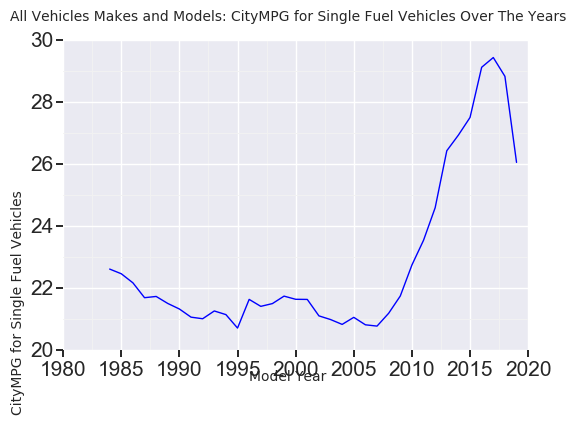

<ggplot: (36497949)>


In [193]:
#Plotting Trend Analysis over the years
print ggplot(dfcleanedTrfmd5, aes('year', 'UCity_mean')) +\
geom_line(color='blue', span=0.2) +\
xlab("Model Year") + ylab("CityMPG for Single Fuel Vehicles") +\
ggtitle("All Vehicles Makes and Models: CityMPG for Single Fuel Vehicles Over The Years") +\
scale_y_continuous(labels='millions') 

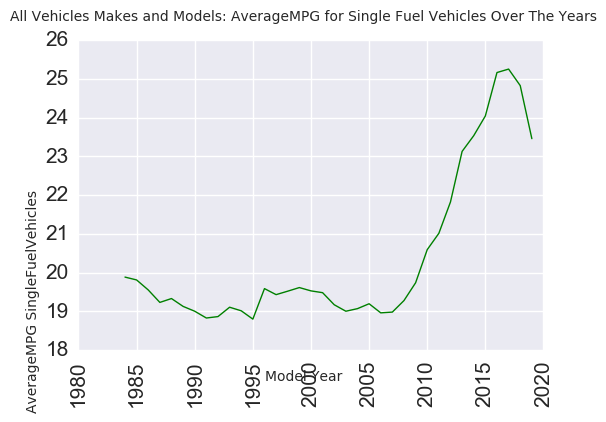

<ggplot: (65999038)>


In [195]:
print ggplot(dfcleanedTrfmd5, aes('year', 'comb08_mean')) +\
geom_line(color='green') +\
xlab("Model Year") + ylab("AverageMPG SingleFuelVehicles") +\
ggtitle("All Vehicles Makes and Models: AverageMPG for Single Fuel Vehicles Over The Years") +\
scale_y_continuous(labels='millions') +\
    theme(axis_text_x=element_text(angle=90))

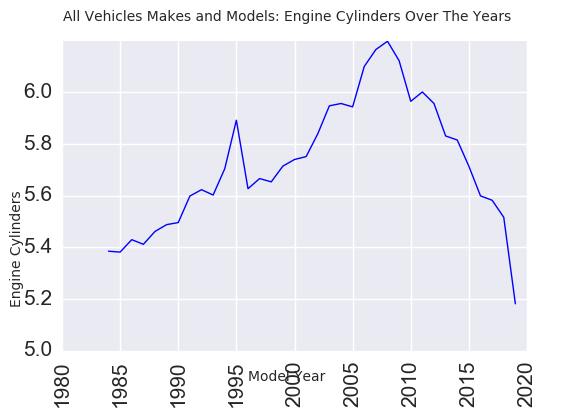

<ggplot: (66674955)>


In [197]:
print ggplot(dfcleanedTrfmd5, aes('year', 'cylinders_mean')) +\
geom_line(color='blue') +\
xlab("Model Year") + ylab("Engine Cylinders") +\
ggtitle("All Vehicles Makes and Models: Engine Cylinders Over The Years") +\
scale_y_continuous(labels='millions') +\
    theme(axis_text_x=element_text(angle=90))  

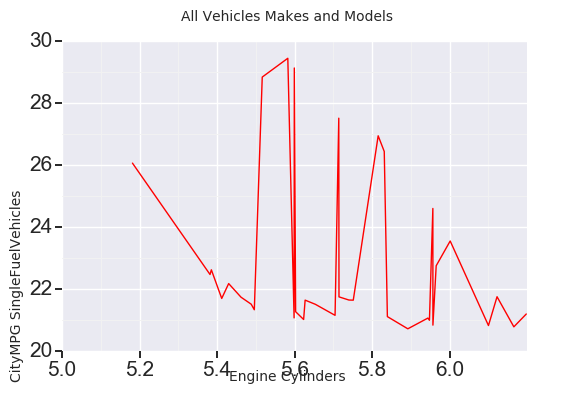

<ggplot: (67251502)>


In [198]:
print ggplot(dfcleanedTrfmd5, aes('cylinders_mean', 'UCity_mean')) +\
geom_line(color='red') +\
xlab("Engine Cylinders") + ylab("CityMPG SingleFuelVehicles") +\
ggtitle("All Vehicles Makes and Models") + scale_y_continuous(labels='millions') 

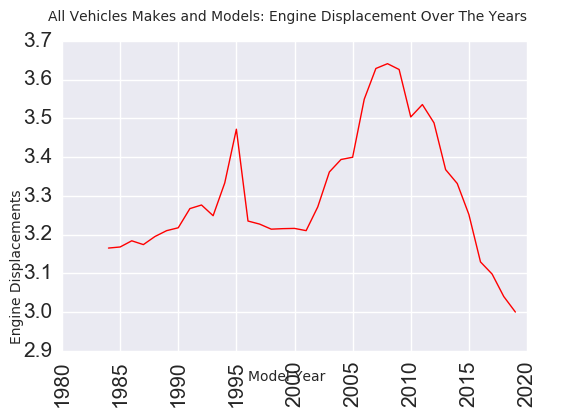

<ggplot: (66120768)>


In [199]:
print ggplot(dfcleanedTrfmd5, aes('year', 'displ_mean')) +\
geom_line(color='red') +\
xlab("Model Year") + ylab("Engine Displacements") +\
ggtitle("All Vehicles Makes and Models: Engine Displacement Over The Years") +\
scale_y_continuous(labels='millions') +\
    theme(axis_text_x=element_text(angle=90))

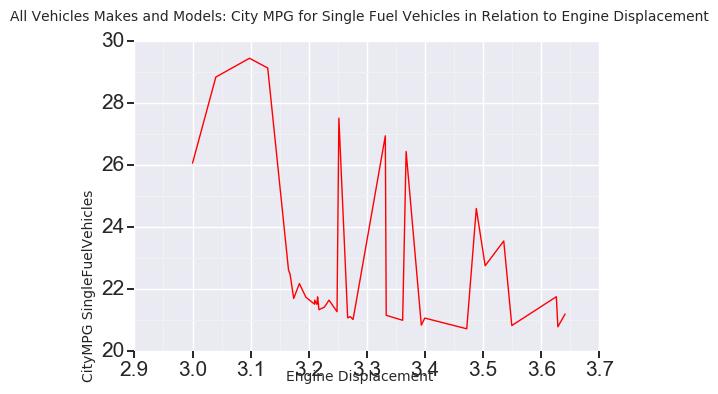

<ggplot: (67957049)>


In [200]:
print ggplot(dfcleanedTrfmd5, aes('displ_mean', 'UCity_mean')) +\
geom_line(color='red') +\
xlab("Engine Displacement") + ylab("CityMPG SingleFuelVehicles") +\
ggtitle("All Vehicles Makes and Models: City MPG for Single Fuel Vehicles in Relation to Engine Displacement") +\
scale_y_continuous(labels='millions') 

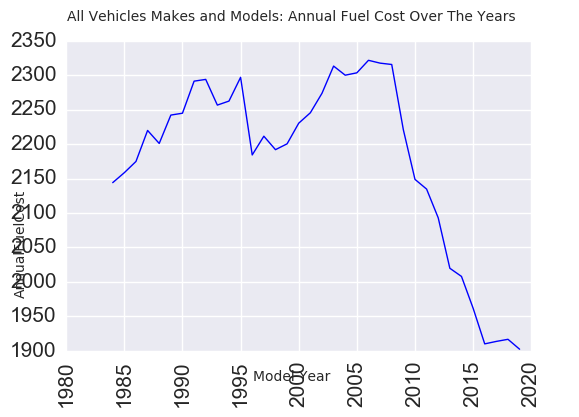

<ggplot: (68481873)>


In [201]:
print ggplot(dfcleanedTrfmd5, aes('year', 'fuelCost08_mean')) +\
geom_line(color='blue') +\
xlab("Model Year") + ylab("AnnualFuelCost") +\
ggtitle("All Vehicles Makes and Models: Annual Fuel Cost Over The Years") +\
scale_y_continuous(labels='millions') +\
    theme(axis_text_x=element_text(angle=90))

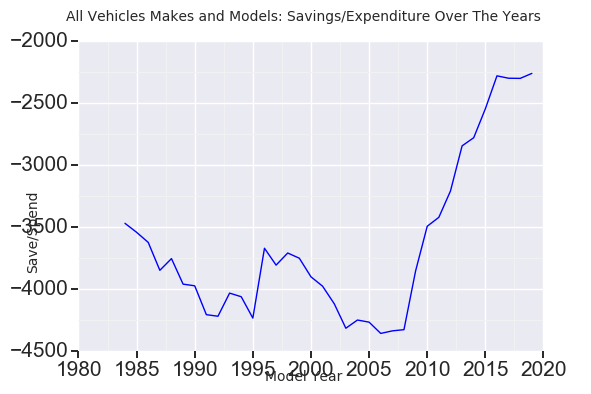

<ggplot: (67708006)>


In [202]:
print ggplot(dfcleanedTrfmd5, aes('year', 'youSaveSpend_mean')) +\
geom_line(color='blue') +\
xlab("Model Year") + ylab("Save/Spend") +\
ggtitle("All Vehicles Makes and Models: Savings/Expenditure Over The Years") +\
scale_y_continuous(labels='millions') 

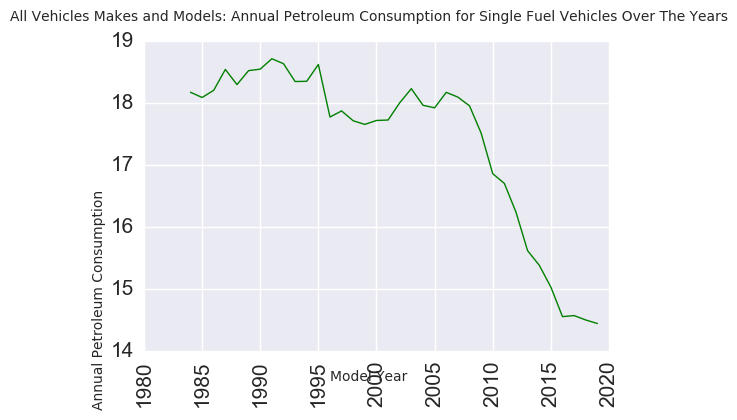

<ggplot: (70088813)>


In [203]:
print ggplot(dfcleanedTrfmd5, aes('year', 'barrels08_mean')) +\
geom_line(color='green') +\
xlab("Model Year") + ylab("Annual Petroleum Consumption") +\
ggtitle("All Vehicles Makes and Models: Annual Petroleum Consumption for Single Fuel Vehicles Over The Years") +\
scale_y_continuous(labels='millions') + \
    theme(axis_text_x=element_text(angle=90))

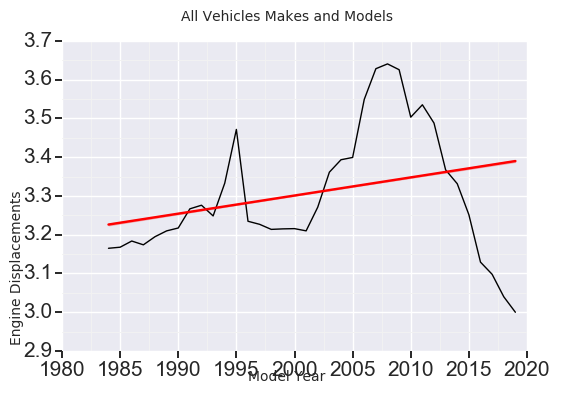

<ggplot: (68802985)>

In [204]:
#Resizing, adjusting ggplot size & X + Y label font size
ggplot(aes(x='year', y='displ_mean'), data=dfcleanedTrfmd5) +\
geom_line() +\
stat_smooth(color='red', span=0.2) +\
xlab("Model Year") + ylab("Engine Displacements") +\
ggtitle("All Vehicles Makes and Models")
#mpl.rcParams["figure.figsize"] = "11, 8"

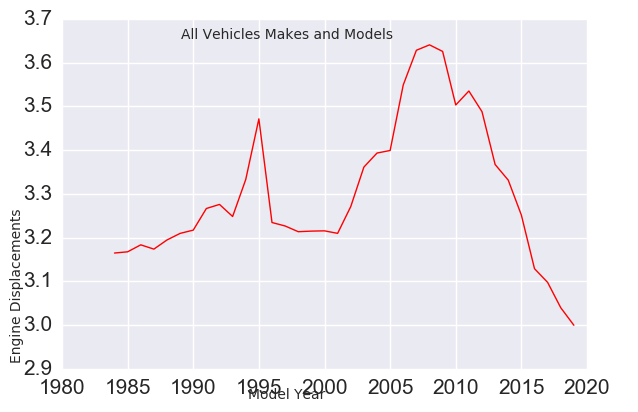

<ggplot: (70532009)>


In [205]:
#Resizing, adjusting ggplot size
print ggplot(dfcleanedTrfmd5, aes('year', 'displ_mean')) +\
geom_line(color='red', span=0.2) +\
xlab("Model Year") + ylab("Engine Displacements") +\
ggtitle("All Vehicles Makes and Models") +\
theme(plot_margin = dict(right = 1, top=1))

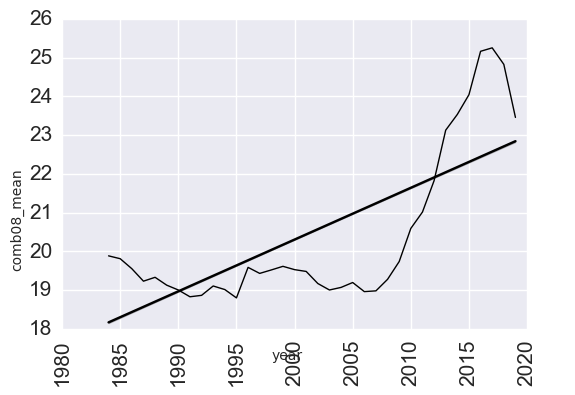

<ggplot: (63891358)>

In [212]:
ggplot(aes(x='year', y='comb08_mean'), data=dfcleanedTrfmd5) +\
    geom_line() +\
    stat_smooth(colour='red', span=0.2) + scale_y_continuous(labels='millions') + \
    theme(axis_text_x=element_text(angle=90))

##### Neural Networks ran in the background using Theano sophisticated Python libraries built on top of NumPy.

In [206]:
# Importing Cross_Validation & Preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

#np.random.seed = 47
np.random.seed = 0
dfcleanedTrfmd5.head()

,cylinders,make,model,trany,year,barrels08_mean,city08_mean,UCity_mean,comb08_mean,cylinders_mean,displ_mean,fuelCost08_mean,highway08_mean,UHighway_mean,youSaveSpend_mean
0,4.0,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,1985,18.086848,17.878307,22.468082,19.808348,5.381989,3.167863,2158.553792,23.042328,32.099529,-3542.768959
1,12.0,Ferrari,Testarossa,Manual 5-spd,1985,18.086848,17.878307,22.468082,19.808348,5.381989,3.167863,2158.553792,23.042328,32.099529,-3542.768959
2,4.0,Dodge,Charger,Manual 5-spd,1985,18.086848,17.878307,22.468082,19.808348,5.381989,3.167863,2158.553792,23.042328,32.099529,-3542.768959
3,8.0,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,1985,18.086848,17.878307,22.468082,19.808348,5.381989,3.167863,2158.553792,23.042328,32.099529,-3542.768959
4,8.0,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,1985,18.086848,17.878307,22.468082,19.808348,5.381989,3.167863,2158.553792,23.042328,32.099529,-3542.768959


##### Preprocessed Data by Standardizing Each Feature Using Scikit-learn StandardScaler. Used train_test_split function from scikit-learn's cross_validation module to:¶

In [207]:
#Preprocessed Data by Standardizing Each Feature Using Scikit-learn StandardScaler. Used train_test_split function 
#from scikit-learn's cross_validation module to randomnly partion test/training data splitting X and y arrays 20/80.
X = np.array(dfcleanedTrfmd5['displ_mean']).reshape(-1,1)
#X = np.array(dfcleanedTrfmd5['year']).reshape(-1,1)
#X = np.array(dfcleanedTrfmd5['cylinders']).reshape(-1,1)
y = np.array(dfcleanedTrfmd5['UCity_mean'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
X, y, test_size=0.2, random_state=9)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled = stdscaler.transform(X_test)

##### The Neural Networks were run in the background using Theano, which are more sophisticated Python libraries built on top of NumPy. Keras, a Python library, was used to train and evaluate the neural networks Optimizaters, Activation Function & Addressing Overfitting.

In [208]:
# Stochastic gradient descent (SGD) defined as the optimizer to minimize loss function.
# Activation function rectified linear unit (relu or ReLU) address errors & overfitting the training data.
# Used linear activation function on linear problem since output is contineous numeric value.
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD


# Stochastic Logistic Regression
model = Sequential()


model.add(Dense(output_dim=5, input_shape=[X_train_scaled.shape[1]], 
                 activation='relu'))
#model.add(Dense(output_dim2, activation='sigmoid'))
model.add(Dense(output_dim=1, activation='linear'))
#model.add(Dense(output_dim=1, activation='sigmoid'))


# Compile model
sgd = SGD(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=sgd)
#model.compile(loss='binary_crossentropy', optimizer=sgd)

In [209]:
# Fitting the Model, allocating batch size,  which is the number of observations per batch.

history = model.fit(X_train_scaled, y_train.reshape(-1,1), batch_size = 256, 
                    nb_epoch = 250, verbose=5,validation_data=(X_test_scaled,y_test.reshape(-1,1)))

Train on 31679 samples, validate on 7920 samples
Epoch 1/250
Epoch 2/250
Epoch 3/250
Epoch 4/250
Epoch 5/250
Epoch 6/250
Epoch 7/250
Epoch 8/250
Epoch 9/250
Epoch 10/250
Epoch 11/250
Epoch 12/250
Epoch 13/250
Epoch 14/250
Epoch 15/250
Epoch 16/250
Epoch 17/250
Epoch 18/250
Epoch 19/250
Epoch 20/250
Epoch 21/250
Epoch 22/250
Epoch 23/250
Epoch 24/250
Epoch 25/250
Epoch 26/250
Epoch 27/250
Epoch 28/250
Epoch 29/250
Epoch 30/250
Epoch 31/250
Epoch 32/250
Epoch 33/250
Epoch 34/250
Epoch 35/250
Epoch 36/250
Epoch 37/250
Epoch 38/250
Epoch 39/250
Epoch 40/250
Epoch 41/250
Epoch 42/250
Epoch 43/250
Epoch 44/250
Epoch 45/250
Epoch 46/250
Epoch 47/250
Epoch 48/250
Epoch 49/250
Epoch 50/250
Epoch 51/250
Epoch 52/250
Epoch 53/250
Epoch 54/250
Epoch 55/250
Epoch 56/250
Epoch 57/250
Epoch 58/250
Epoch 59/250
Epoch 60/250
Epoch 61/250
Epoch 62/250
Epoch 63/250
Epoch 64/250
Epoch 65/250
Epoch 66/250
Epoch 67/250
Epoch 68/250
Epoch 69/250
Epoch 70/250
Epoch 71/250
Epoch 72/250
Epoch 73/250
Epoch 74/25

##### Plotting Root Mean Squared Error (RMSE)

RMSE Loss after final iteration:  1.94507722967


<function matplotlib.pyplot.show>

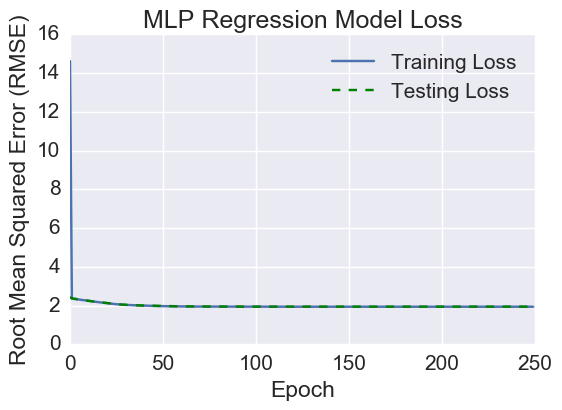

In [210]:
#Plotting Root Mean Squared Error (RMSE), the mean squared difference between true target function values and model 
#predictions.
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
#Summary history for loss
plt.plot(np.sqrt(history.history['loss']))
plt.plot(np.sqrt(history.history['val_loss']), 'g--')
plt.title('MLP Regression Model Loss')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "RMSE Loss after final iteration: ", np.sqrt(history.history['val_loss'][-1])
plt.show

##### Plotting Neural Network Regression ran in the background using Theano, sophisticated Python libraries built on top of NumPy.

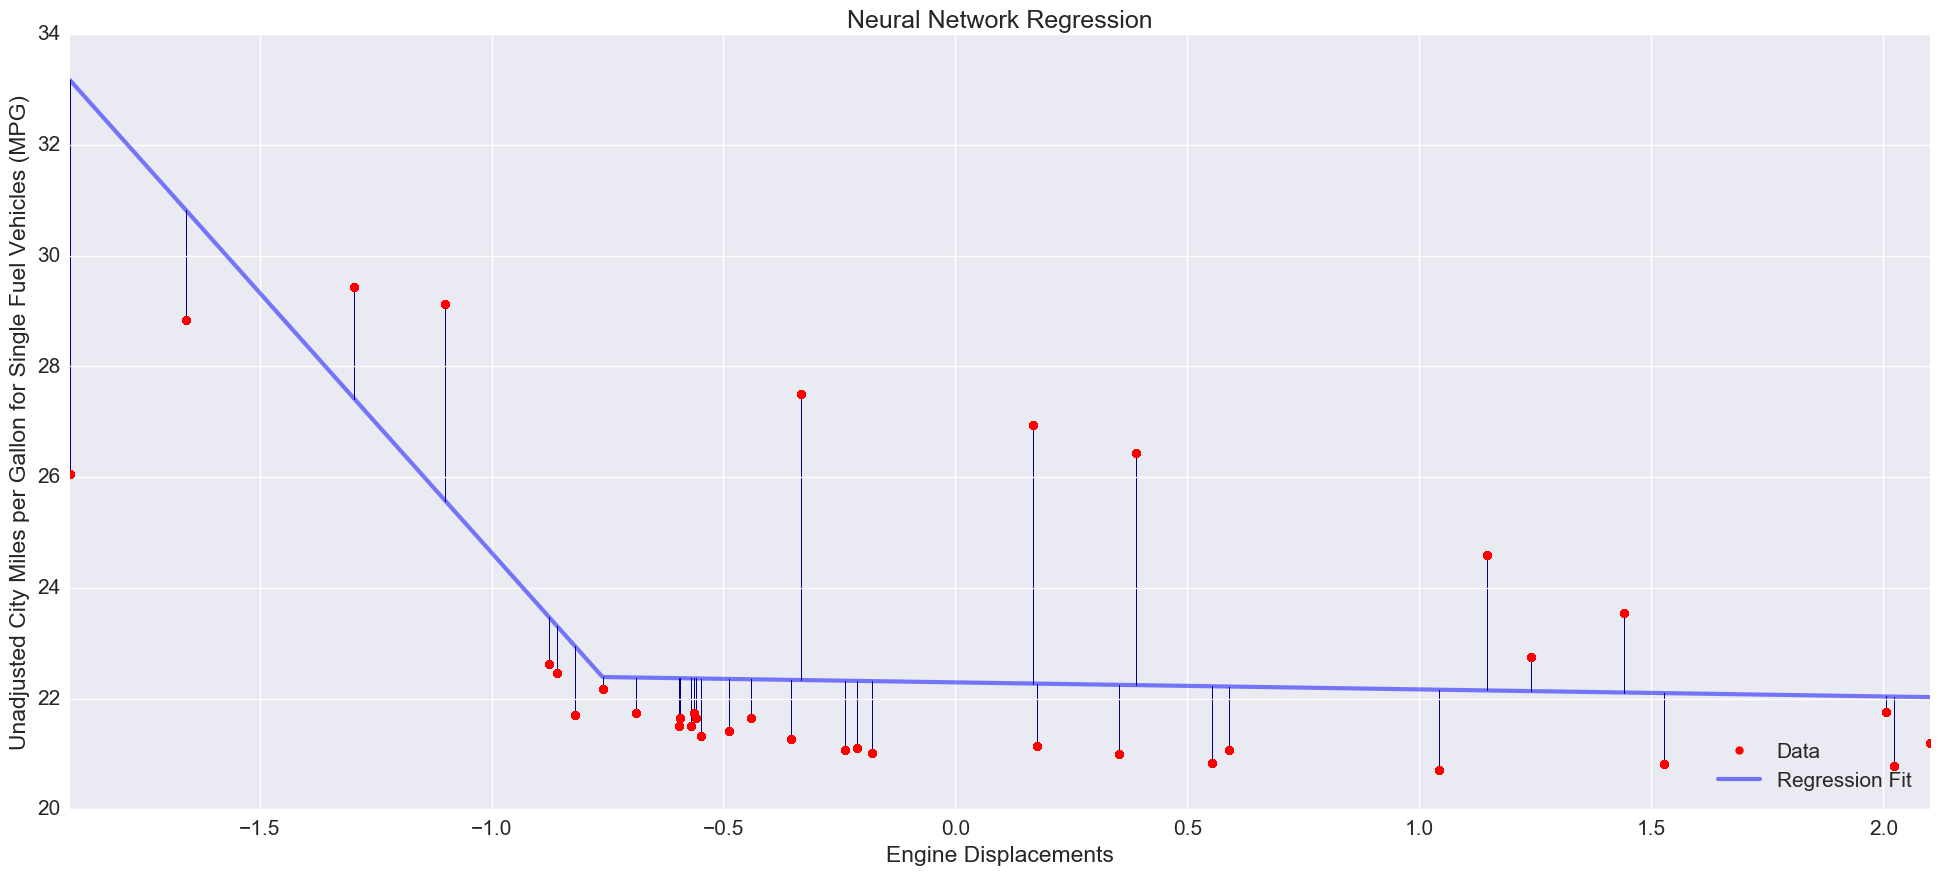

In [211]:
# Plotting Neural Network Regression ran in the background using Theano. 
from matplotlib.collections import LineCollection

y_predicted = model.predict(X_train_scaled)
N = len(y_train)

segments = [[[X_train_scaled[i], y_train[i]], [X_train_scaled[i], y_predicted[i]]] for i in range(N)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y_train)))
lc.set_alpha(0.5)
lc.set_linewidths(0.5 * np.ones(len(y_train)))

fig = plt.figure(figsize=[24,10])
# Plotting the training data
plt.plot(X_train_scaled, y_train, 'r.', markersize=12)
# Plotting the prediction line
x_lin = np.linspace(X_train_scaled.min(),X_train_scaled.max(),1000).reshape(-1,1)
plt.plot(x_lin, model.predict(x_lin), color='blue',linewidth=3,alpha=0.5)
# Plotting the residuals
plt.gca().add_collection(lc)

plt.xlim([X_train_scaled.min(),X_train_scaled.max()])
#plt.xlabel('Time Period in Years')
#plt.xlabel('Combined MPG for Single Fuel Vehicles (fuelType1)')
#plt.xlabel('Years')
#plt.xlabel('Engine Cylinders')
plt.xlabel('Engine Displacements')
#plt.xlabel('Annual Fuel Cost(fuelCost08) for Single Fuel Vehicles(fuelType1)')
plt.ylabel('Unadjusted City Miles per Gallon for Single Fuel Vehicles (MPG)')
plt.legend(('Data', 'Regression Fit'), loc='lower right')
plt.title('Neural Network Regression')

# Plotting the regression line
plt.show()
